# TensorFlow

## Librerias

In [65]:
# librerias generales
import numpy as np
import pandas as pd
import json
import os
import random
from pathlib import Path
import sys



# bases de datos
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from scipy.io import loadmat
from sklearn.datasets import load_iris
from sklearn.datasets import load_sample_images
#import tensorflow_datasets as tfds


# preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# modelos DL
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn import model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model


# metricas de evalucacion
from sklearn.metrics import mean_squared_error


# modelos pre-entrenados
from tensorflow.keras.models import clone_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img

# pipelines
from sklearn.pipeline import make_pipeline



In [ ]:
# instalar paquetes

import sys
!{sys.executable} -m pip install opencv-python 
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install scikit-learn

In [91]:
# configuracion de graficas

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [92]:
IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrón 

In [2]:

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

per_clf

Perceptron(random_state=42)

## Perceptrón Multi-Capa (MLP)

In [3]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

mlp_reg

MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

In [4]:
iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)

mlp_clf

MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)

## Modelo Secuencial

In [5]:
# crear FeedForward NN 
# 1 capa escondida
# 1x63 neuronas, activacion 'relu', input_shape=1x784
nn1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

nn1

In [7]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(nn1, "nn1.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
# crear nn secuencia
red1 = Sequential()

# agregar capas de red una por una 
red1.add(Flatten(input_shape=(28,28) , name='capa1'))
red1.add(Dense(16, activation='relu', name='capa2'))
red1.add(Dense(16, activation='relu', name='capa3'))
red1.add(Dense(16, activation='tanh', name='capa4'))
red1.add(Dense(10, activation='softmax', name='capa5'))

red1


In [14]:
# pesos (parametros) de la red neuronal
red1.weights

[<tf.Variable 'capa2/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.06759036, -0.08197623,  0.08638555, ..., -0.01396601,
          0.04049806, -0.08476225],
        [ 0.07706045, -0.07040039,  0.03884488, ..., -0.03688906,
         -0.03569657, -0.08314649],
        [-0.06420656, -0.0086022 ,  0.03048519, ...,  0.02373324,
         -0.07002807, -0.03534719],
        ...,
        [-0.06867819, -0.04693267,  0.06548391, ...,  0.00890583,
         -0.07323708,  0.03963739],
        [ 0.08476055,  0.05505651,  0.08033797, ...,  0.02229393,
          0.07821168,  0.05428958],
        [-0.02140547, -0.04117681,  0.08419475, ..., -0.01981232,
          0.04075645, -0.01451532]], dtype=float32)>,
 <tf.Variable 'capa2/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'capa3/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-2.29836479e-01, -3.26643884e-02, -4.10344452e-01,


In [11]:
# descripcion de modelo
red1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa1 (Flatten)             (None, 784)               0         
                                                                 
 capa2 (Dense)               (None, 16)                12560     
                                                                 
 capa3 (Dense)               (None, 16)                272       
                                                                 
 capa4 (Dense)               (None, 16)                272       
                                                                 
 capa5 (Dense)               (None, 10)                170       
                                                                 
Total params: 13274 (51.85 KB)
Trainable params: 13274 (51.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# capas de la red neuronal
red1.layers

In [16]:
# crear FeedForward NN 
nn2= Sequential()

# agregar capas una por una
nn2.add(Dense(64, activation='relu', input_shape=(784,)))
nn2.add(Dense(10, activation='softmax'))

nn2 

In [125]:
# crear FeedForward NN 
nn3= Sequential()

# agregar capas una por una
nn3.add(Flatten(input_shape=(28,28)))
nn3.add(Dense(64, activation='relu', input_shape=(784,)))
nn3.add(Dense(10, activation='softmax'))

nn3

In [126]:
# crear FeedForward NN 
nn4= Sequential()

# agregar capas
nn4.add(Dense(64, activation='relu', input_shape=(784,)))
nn4.add(Dense(10, activation='softmax'))

nn4 

## CNN: Redes Neuronales Convolucionales

In [17]:
#  crear CNN 
cnn1= Sequential()

# agregar capa de convolucion
cnn1.add(Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3))) # 30x30x16

# agregar capa de pooling
cnn1.add(MaxPooling2D(pool_size=(3,3))) # 10x10,16

# agregar capas
cnn1.add(Flatten()) # vector de 1 dimension # 1x1600
cnn1.add(Dense(64, activation='relu')) # 64
cnn1.add(Dense(10, activation='softmax')) # 10


cnn1.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000002D247F91710>>

In [18]:
# crear nn 
cnn2 = Sequential()

# agregar capa convolucional
cnn2.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1) ))
# agregar capa pooling
cnn2.add(MaxPooling2D(pool_size=3))

# agregar capas 
cnn2.add(Flatten())
cnn2.add(Dense(10, activation='softmax'))

# descripcion de nn
cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Inicializador de pesos y sesgos (bias)

In [19]:
# crear modelo
model1 = Sequential()

# agregar capa de convolucion
model1.add(Conv1D(filters = 16, kernel_size =3, input_shape = (128,64), kernel_initializer ='random_uniform', bias_initializer ='zeros', activation='relu'))

# agregar capa de pooling
model1.add(MaxPooling1D(pool_size =4))

# agregar capas
model1.add(Flatten())
model1.add(Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation= 'relu'))

# agregar capa densa con inicializadores
# kernel con distribucion RandomNormal u=0, sd=0.05
# sesgo (bias) constante = 0.4
# activacion relu
model1.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)



# agregar capa densa
# kernel con distribucion Ortogonal G=1
# sesgo (bias) constante = 0.4
# activacion relu
model1.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))


# resumen de modelo
model1.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                31808     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                      

In [20]:
# definir inicializador custom(personalizado)

def custom_init (shape, dtype=None):    
    return K.random_normal(shape, dtype=dtype)
    
model1.add(Dense(64, kernel_initializer=custom_init))
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                31808     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                      

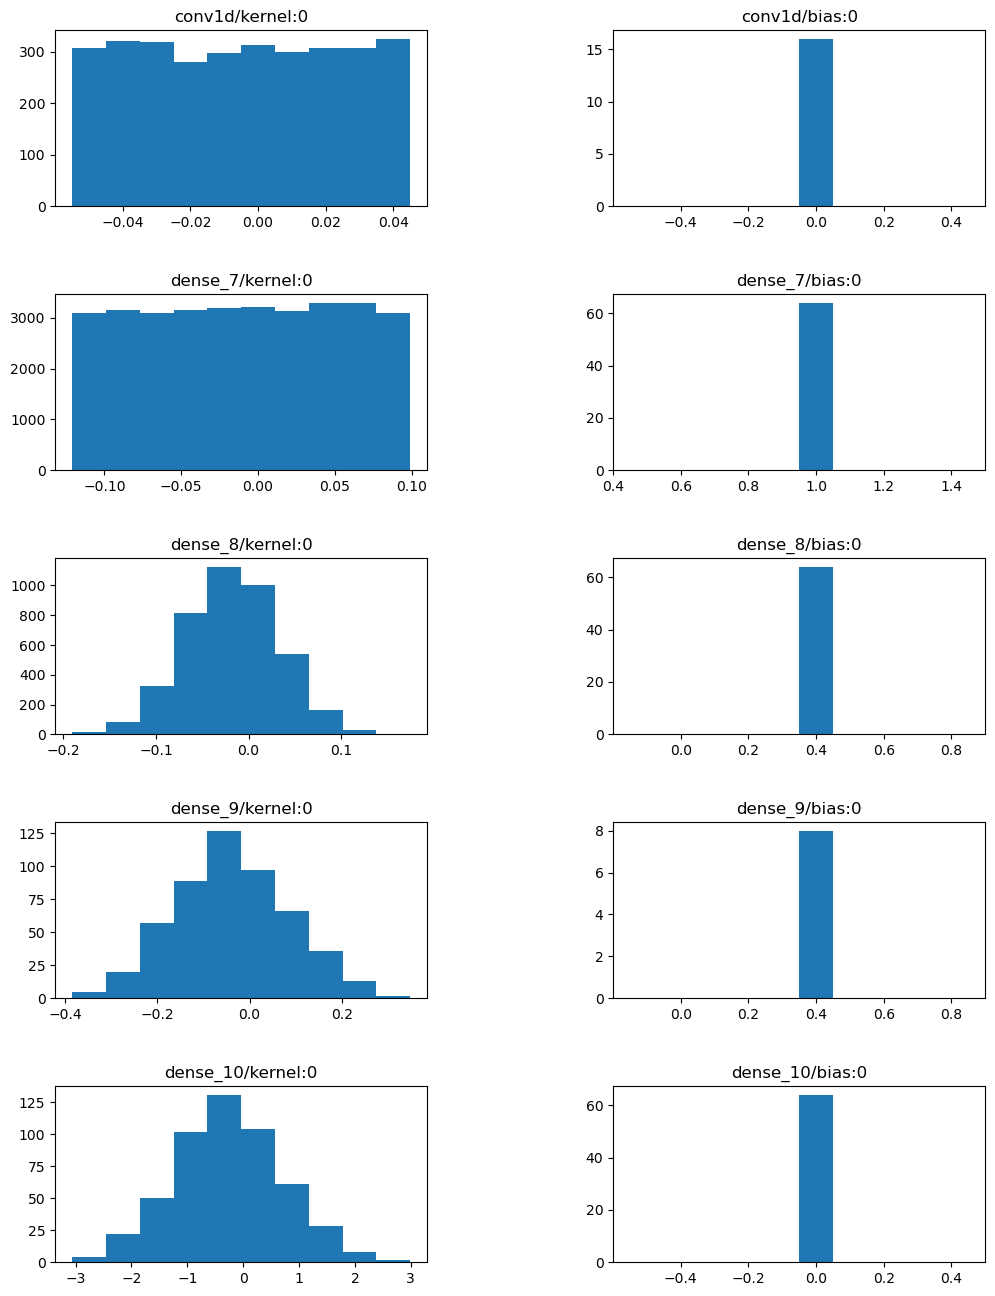

In [21]:
# Visualizacion de pesos y sesgo(bias) inicializados

# histogramas
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# filtrar capas de pooling y flatten que no tienen pesos
weight_layers = [layer for layer in model1.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)



In [22]:
# compilar modelos
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

# compilar modelo

#  optimizer: Adam(learning_rate=0.005)
# loss function: 'cross_entropy'
# metricas de evaluacion: ['accuracy','recall','mae']

model1.compile(optimizer=opt,
               loss='cross_entropy',
               metrics=['accuracy','recall','mae'])

model1.summary()     


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                31808     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                      

## Funciones de Activación 


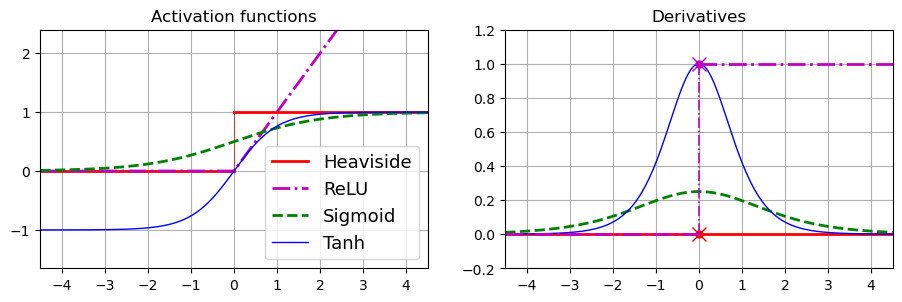

In [23]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

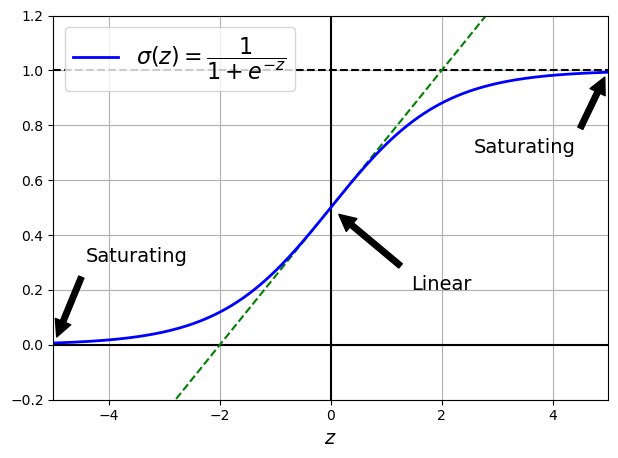

In [95]:
# extra code – this cell generates and saves Figure 11–1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

In [97]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")
dense

In [100]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)
dense 


In [ ]:
# funciones de activacion no saturadas

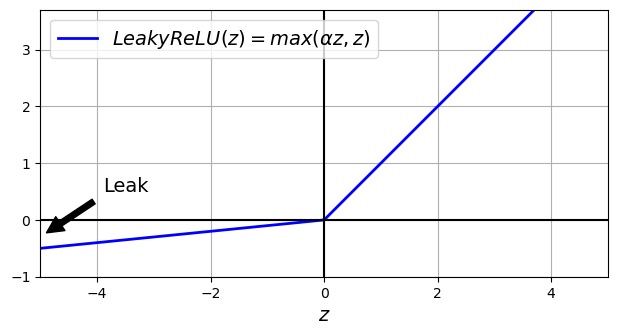

In [102]:
# extra code – this cell generates and saves Figure 11–2

def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

In [103]:
model = tf.keras.models.Sequential([
    # [...]  # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),  # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2),  # activation as a separate layer
    # [...]  # more layers
])

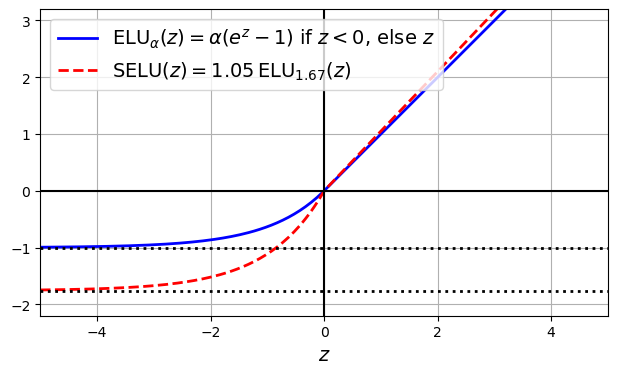

In [104]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [105]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

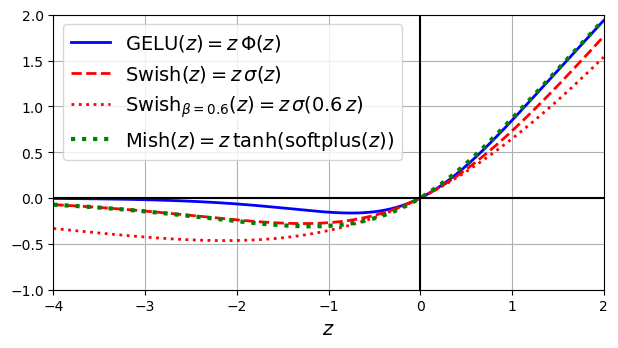

In [119]:
# extra code – this cell generates and saves Figure 11–4

def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

save_fig("gelu_swish_mish_plot")
plt.show()

## Fashion-MNIST dataset

In [111]:
tf.random.set_seed(42)

# crear modelo Sequential
# capa de entrada: Flatten 1xN (input_shape= [28, 28])
# capas densas: 100 capas, 100 neuronas, activacion='selu',  kernel_initializer="lecun_normal"
# capa de salida: 10 neuronas(clases), activacion='softmax'

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100): # iterar sobre 100 capas
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

# compilar modelo
# loss function (perdidas): sparse_categorical_crossentropy
# optimizer: SGD (tasa de aprendizaje: 0.001)
# metricas de evaluacion: accuracy 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_420 (Dense)           (None, 100)               78500     
                                                                 
 dense_421 (Dense)           (None, 100)               10100     
                                                                 
 dense_422 (Dense)           (None, 100)               10100     
                                                                 
 dense_423 (Dense)           (None, 100)               10100     
                                                                 
 dense_424 (Dense)           (None, 100)               10100     
                                                                 
 dense_425 (Dense)           (None, 100)              

In [112]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# dividir bases de datos en entrenamiento y prueba
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [113]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# clases de y-target multi-clase
# capa de salida tiene el mismo numero de clases 

### Preprocesamiento

In [114]:
# pre-procesamiento de bases de datos
pixel_means = X_train.mean(axis=0, keepdims=True) # promedio de pixeles
pixel_stds = X_train.std(axis=0, keepdims=True)# desviacion de pixeles

# escalar base de datos con desviacion estandar de pixeles 
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [115]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/5
1719/1719 [==============================] - 30s 14ms/step - loss: 1.1744 - accuracy: 0.5472 - val_loss: 0.7810 - val_accuracy: 0.7204
Epoch 2/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7339 - accuracy: 0.7316 - val_loss: 0.6859 - val_accuracy: 0.7550
Epoch 3/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.6223 - accuracy: 0.7707 - val_loss: 0.5666 - val_accuracy: 0.7938
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5863 - accuracy: 0.7878 - val_loss: 0.5432 - val_accuracy: 0.8014
Epoch 5/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5145 - accuracy: 0.8154 - val_loss: 0.5226 - val_accuracy: 0.8208


In [117]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [118]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 13ms/step - loss: 1.9840 - accuracy: 0.2236 - val_loss: 1.6796 - val_accuracy: 0.3222
Epoch 2/5
1719/1719 [==============================] - 20s 12ms/step - loss: 1.3935 - accuracy: 0.4040 - val_loss: 1.4173 - val_accuracy: 0.3382
Epoch 3/5
1719/1719 [==============================] - 21s 12ms/step - loss: 1.1696 - accuracy: 0.5059 - val_loss: 0.9650 - val_accuracy: 0.6166
Epoch 4/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.9507 - accuracy: 0.6349 - val_loss: 0.8277 - val_accuracy: 0.6992
Epoch 5/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.8274 - accuracy: 0.6931 - val_loss: 0.7421 - val_accuracy: 0.7226


## Métricas de Evaluacion

In [38]:
# crear modelo Secuencial

# agregar capas
# Flatten: tamaño entrada 28x28
# Densa: 32, activacion='relu'
# Densa: 32, activacion='relu'
# Densa: 10, activacion='softmax'
 
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(32, activation='relu'),
  Dense(32, activation='tanh'),
  Dense(10, activation='softmax'),
])

model

In [39]:
# compilar modelo

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = 'accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = 'binary_accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['binary_accuracy'])

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = BinaryAccuracy, threshold=0.5 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])



In [40]:
# compilar modelo

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: sparse_categorical_accuracy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: SparseCategoricalAccuracy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [41]:
# compilar modelo

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: top-k categorical accuracy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["top_k_categorical_accuracy"])

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: SparseTopKCategoricalAccuracy(k=3)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

### Metricas Personalizadas

In [42]:
# definir metricas de evaluación personalizadas

# metrica de evaluación custom: mean/promedio
# parametros: y_true (observaciones reales), y_pred (predicciones)
def custom_mean(y_true, y_pred):
    return K.mean(y_pred)

# compilar modelo
# optimizer='adam'
# loss function: sparse_categorical_crossentropy
# métrica de evaluación: custom_mean (personalizada)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[custom_mean])

# múltiples métricas de evaluación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[custom_mean, 'accuracy', tf.metrics.SparseTopKCategoricalAccuracy(k=3) ]
) 


In [43]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación: MeanSquaredError, AUC
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.metrics.MeanSquaredError(),
        tf.metrics.AUC(),
    ]
)


In [44]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación:  custom_mse, custom_auc
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.metrics.MeanSquaredError(name='custom_mse'),
        tf.metrics.AUC(name='custom_auc'),
    ]
)

In [45]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación:  custom_mse, custom_auc

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
        'AUC',
    ]
)

In [ ]:

# definir parametros para compilar el modelo
accuracy = tf.keras.metrics.CategoricalAccuracy()
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# iterar sobre batches de base de datos
for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        logits = model(x)
        
        # calcular loss function 
        loss_value = loss_fn(y, logits)

    # actualizar estado de métrica accuracy
    accuracy.update_state(y, logits)
    
    # actualizar pesos(parametros) de modelo para minimizar funcion de perdidas
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Logging the current accuracy value so far.
    if step % 100 == 0:
        print('Step:', step)        
        print('Total running accuracy so far: %.3f' % accuracy.result())
        


In [47]:

# metrica custom: diferencia al cuadrado
def custom_sqrtdiff(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

# compilar modelo
# optimizer: 'adam'
# loss function: 'mean_squared_error'
# metrics: custom_sqrtdiff
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_sqrtdiff])

In [50]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

# crear modelo Sequential
# capa conectada: capa densa, input_shape=X_train.shape[1:],  30 unidades , activacion=relu, kernel_initializer="he_normal"
# capa de salida: capa densa, 1 neurona (clasificacion binaria)

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 30)                270       
                                                                 
 dense_60 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# funcion: métrica de evaluacion personalizada
# huber
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn


In [54]:
# compilar modelo
# loss function (funcion de pérdidas): MSE
# optimizador: Nadam
# métrica de evaluación: Huber(umbral=2)
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])
# extra code – train the model with our custom metric

# entrenar modelo
# epochs: 2
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2


363/363 [==============================] - 2s 2ms/step - loss: 0.5325 - huber_fn: 0.2592
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4563 - huber_fn: 0.2236


In [55]:
# crear métric HuberMetric
# atributos(variables): threshold, huber_fn, total, count
# metodo: init(inicializar), actualizar estado, resultado, configuracion


class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)  # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    
    

In [59]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [60]:
tf.random.set_seed(42)

# crear modelo Sequential basico
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

# compilar modelo HuberMetric (personalizada)
# optimizador: Nadam
# métrica: HuberMetric(umbral)
# loss function (funcion de perdidas): 
model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])

# entrenar/ajustar modelo
# epochs: 2
model.fit(X_train_scaled, y_train, epochs=2)

model.save("my_model_with_a_custom_metric")

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.3962 - huber_metric_4: 1.3962
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.3433 - huber_metric_4: 0.3433
INFO:tensorflow:Assets written to: my_model_with_a_custom_metric\assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_metric\assets


In [64]:
# cargar modelo
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)
# ajustar modelo
model.fit(X_train_scaled, y_train, epochs=2)

model.metrics[-1].threshold

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2498 - huber_metric_4: 0.2498
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2133 - huber_metric_4: 0.2133


2.0

In [66]:

# clase de metrica personalizada (simplificada)
# atributos: umbral, huber_fn
# metodos: inicializar, actualizar estado, configuracion
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}     

In [67]:
tf.random.set_seed(42)
# crear modelo Sequential simple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])
# compilar modelo
# loss function (funcion de perdidas): metrica de evaluacion personalizada (Huber)
# optimizador: Nadam
# métrica pesada: HuberMetric(2.0)

model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

In [70]:
np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())
# guardar modelo
model.save("my_model_with_a_custom_metric_v2")

Epoch 1/2
 80/363 [=====>........................] - ETA: 0s - loss: 0.1149 - HuberMetric: 0.2299

363/363 [==============================] - 1s 2ms/step - loss: 0.1039 - HuberMetric: 0.2093
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1000 - HuberMetric: 0.2015
INFO:tensorflow:Assets written to: my_model_with_a_custom_metric_v2\assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_metric_v2\assets


In [71]:
# cargar modelo sintonizado con métrica personalizada
model = tf.keras.models.load_model("my_model_with_a_custom_metric_v2",
                                   custom_objects={"HuberMetric": HuberMetric})

model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.1980 - HuberMetric: 0.1980
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1927 - HuberMetric: 0.1927


## Entrenamiento 



In [34]:
# crear red neuronal
red1 = Sequential()

# agregar capa convolucional
red1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))

# agregar capa de pooling
red1.add(MaxPooling2D((3,3)))

# agregar capas
red1.add(Flatten())
red1.add(Dense(10, activation='softmax'))

red1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# compilar modelo

# definir parametros de compilar
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

# compilar modelo

red1.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy', 
             metrics=[acc, mae])


red1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# cargar bases de datos
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()


In [37]:
# datos de entrenamiento
train_images, train_labels
train_images.shape


x_train = train_images
y_train = train_labels

x_test = test_images
y_test = test_labels


In [38]:
# definir etiquetas (clases)
etiquetas = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
etiquetas 

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
# preprocesamiento

# escalar imagenes a valores entre 0-1}
x_train  = x_train /255.
x_test = x_test /255.

In [40]:
# entrenar modelo con train-set
aprendizaje = red1.fit(x_train[..., np.newaxis], y_train, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 7s - loss: 0.5518 - sparse_categorical_accuracy: 0.8069 - mean_absolute_error: 4.4200 - 7s/epoch - 28ms/step
Epoch 2/8
235/235 - 6s - loss: 0.3767 - sparse_categorical_accuracy: 0.8686 - mean_absolute_error: 4.4200 - 6s/epoch - 25ms/step
Epoch 3/8
235/235 - 7s - loss: 0.3396 - sparse_categorical_accuracy: 0.8795 - mean_absolute_error: 4.4200 - 7s/epoch - 29ms/step
Epoch 4/8
235/235 - 8s - loss: 0.3201 - sparse_categorical_accuracy: 0.8867 - mean_absolute_error: 4.4200 - 8s/epoch - 34ms/step
Epoch 5/8
235/235 - 8s - loss: 0.3085 - sparse_categorical_accuracy: 0.8899 - mean_absolute_error: 4.4200 - 8s/epoch - 34ms/step
Epoch 6/8
235/235 - 7s - loss: 0.2995 - sparse_categorical_accuracy: 0.8935 - mean_absolute_error: 4.4200 - 7s/epoch - 32ms/step
Epoch 7/8
235/235 - 7s - loss: 0.2885 - sparse_categorical_accuracy: 0.8967 - mean_absolute_error: 4.4200 - 7s/epoch - 31ms/step
Epoch 8/8
235/235 - 7s - loss: 0.2834 - sparse_categorical_accuracy: 0.8978 - mean_absolute_error

In [41]:
aprendizaje.params

{'verbose': 2, 'epochs': 8, 'steps': 235}

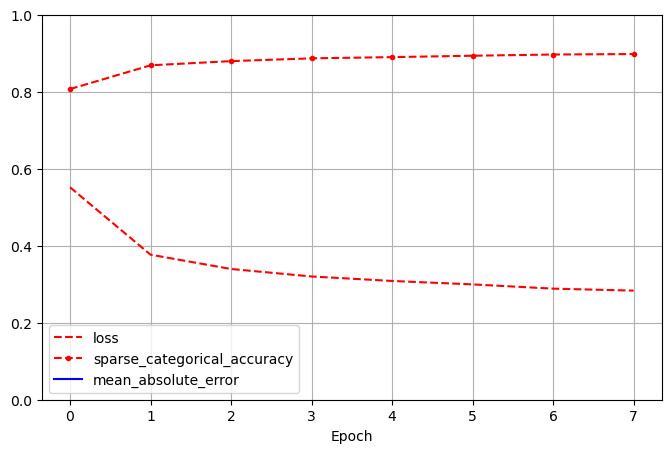

In [43]:
pd.DataFrame(aprendizaje.history).plot(
    figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]) # xlim=[0, 29]
plt.legend(loc="lower left")  # extra code
#save_fig("keras_learning_curves_plot")  # extra code
plt.show()

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

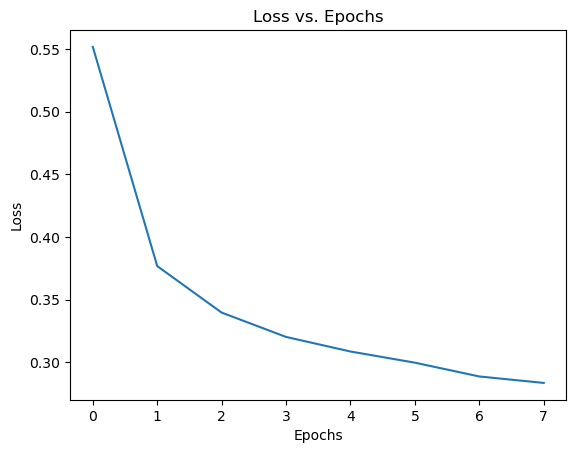

In [44]:
# plot curva de aprendizaje en entrenamiento
aprendizaje_df = pd.DataFrame(aprendizaje.history)


loss_plot =  aprendizaje_df.plot(y='loss', title= 'Loss vs. Epochs', legend = False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')
              


## Evaluación de modelo

In [46]:
# metricas de evaluacion de modelo
mean, sc_acc,mae = red1.evaluate(x_test, y_test)
print('Mean: ', mean)
print('SparseCategorical Accuracy: ', sc_acc)
print('MAE: ', mae)

# crear predicciones 
y_pred = red1.predict(x_test)    


 19/313 [>.............................] - ETA: 0s - loss: 0.2789 - sparse_categorical_accuracy: 0.9062 - mean_absolute_error: 4.2365

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - sparse_categorical_accuracy: 0.8822 - mean_absolute_error: 4.4200
Mean:  0.3355892300605774
SparseCategorical Accuracy:  0.8822000026702881
MAE:  4.419997215270996
313/313 [==============================] - 1s 2ms/step


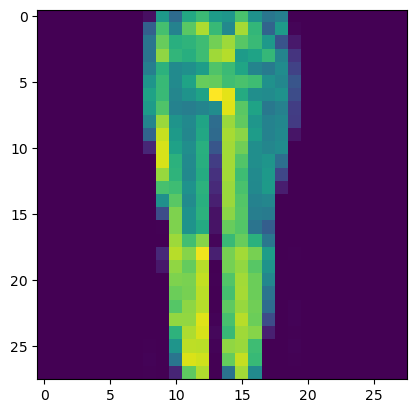

Etiqueta:  Trouser


In [47]:
# escoger imagen random de test-set
random_inx = np.random.choice(x_test.shape[0])
#inx = 30

test_image = x_test[random_inx]
plt.imshow(test_image)
plt.show()

print('Etiqueta: ', etiquetas[y_test[random_inx]] )


In [48]:
y_pred = red1.predict(test_image[np.newaxis,...,np.newaxis])
y_pred

print('Predicción: ', etiquetas[np.argmax(y_pred)] )

1/1 [==============================] - 0s 59ms/step
Predicción:  Trouser


## Modelos Complejos

In [53]:
# capa de regularizacion
normalization_layer = tf.keras.layers.Normalization() 

# capa densas
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")

# capa de concatenacion
concat_layer = tf.keras.layers.Concatenate()

# capa de salida: 1 neurona
output_layer = tf.keras.layers.Dense(1)

# capa de entrada: input_shape= X_train.shape[1:]
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])


normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 normalization_2 (Normaliza  (None, 4)                    9         ['input_3[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_21 (Dense)            (None, 30)                   150       ['normalization_2[0][0]']     
                                                                                                  
 dense_22 (Dense)            (None, 30)                   930       ['dense_21[0][0]']      

In [ ]:
# optimizador: Adam
# tasa de aprendizaje: 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# compilar modelo
# loss function (funcion de perdidas): "mse"
# optimizador: Adam
# metrica de evaluación: RMSE
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

normalization_layer.adapt(X_train)

# entrenamiento
# epochs: 20
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)



In [58]:
tf.random.set_seed(42)  # extra code
# ancho de entrada
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
# profundidad de entrada
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

# capas de regularización (normalizacion)
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# capas densas: 30 unidades
# activacion: relu
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

# capa de concatenación
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# capa de salida
output = tf.keras.layers.Dense(1)(concat)


model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 6)]                  0         []                            
                                                                                                  
 normalization_10 (Normaliz  (None, 6)                    13        ['input_11[0][0]']            
 ation)                                                                                           
                                                                                                  
 input_10 (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 dense_33 (Dense)            (None, 30)                   210       ['normalization_10[0][0]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

## Modelos Personalizados




In [72]:
# modelos personalizados
# clase: ResidualBlock
# parametros: capa
# atributos: capa escondida (n_neurons= numero de unidades, activacion=relu, kernel_initializer="he_normal)
# metodos: inicializador, call
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z
    
    
# modelos personalizados
# clase: Modelo
# parametros: modelo
# atributos: capa escondida (n_neurons= numero de unidades, activacion=relu, kernel_initializer="he_normal), bloque 1,2, capa de salida
# metodos: inicializador, call
    
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [73]:
# extra code – shows that the model can be used normally
tf.random.set_seed(42)
model = ResidualRegressor(1) # crear modelo personalizado  ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam") # compilar modelo (loss function=MSE, optimizador= Nadam)
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model")

Epoch 1/2
363/363 [==============================] - 6s 2ms/step - loss: 50.8248
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.7496
INFO:tensorflow:Assets written to: my_custom_model\assets


INFO:tensorflow:Assets written to: my_custom_model\assets


In [74]:
# extra code – the model can be loaded and you can continue training or use it
#              to make predictions
model = tf.keras.models.load_model("my_custom_model") # cargar modelo pre-entrenado
history = model.fit(X_train_scaled, y_train, epochs=2) # entrenar modelo, epochs=2
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 3s 2ms/step - loss: 1.1124
Epoch 2/2
1/1 [==============================] - 1s 536ms/step


array([[0.9738136],
       [1.2880872],
       [3.005503 ]], dtype=float32)

In [76]:
tf.random.set_seed(42)

block1 = ResidualBlock(2, 30) # crear bloque1
# crear modelo Sequential simple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])

## CNN Clasificador de imagenes de digitos a mano

* CNN clasificador multi clase de imagenes a mano para 10 clases
* Base de datos MNIST

### cargar datos

In [58]:
# cargar datos
data = tf.keras.datasets.mnist

# separar base de datos en train-set(ajustar parametros) y test-set(evaluar modelo)

(x_train, train_labels), (x_test, test_labels) = data.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Preprocesamiento

* Escalar/estandarizar train-set y test-set
* Agregar dimensión dummy 

In [59]:
# escalar/estandarizar x_train, x_test en rango [0-1]
def scale_mnist_data(train_images, test_images):
    
    # Reshape  y normalizar x_train y x_test
    x_train_scaled = train_images / 255.0
    x_test_scaled = test_images / 255.0
    
    return (x_train_scaled, x_test_scaled)

(scaled_train_images, scaled_test_images) = scale_mnist_data(x_train, x_test)
scaled_train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [60]:
# Add a dummy channel dimension
# agregar dimension 'dummy'
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]
scaled_train_images.shape 

(60000, 28, 28, 1)

### Modelo CNN

In [ ]:

# crear CNN  (Sequential)

# capas:
# (input)convolucional:  input_shape=input_shape=(28, 28, 1), convolucion 3x3, 8 filtros, activation='relu'

# pooling: ventana 2x2 
# Flatten: (1,N)
# Dense: 2 capas  1x64

# (output) Dense: 1 capa 1x10 (clases)
 
def get_model(input_shape):

    cnn_digit = Sequential() # crear modelo secuencial
    
    # agregar capa convolucional
    # input_shape= input_shape=(28, 28, 1)
    # convolucion 3x3, 8 filtros, activation='relu'
     
    cnn_digit.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))

    # agregar capa de pooling
    # 2x2 ventana
    cnn_digit.add(MaxPooling2D( pool_size=(2, 2)))

    # agregar capas
    cnn_digit.add(Flatten()) # (1,N)
    cnn_digit.add(Dense(64, activation='relu')) # 1x64
    cnn_digit.add(Dense(64, activation='relu')) # 1x64

    # capa de salida (clases)
    cnn_digit.add(Dense(10, activation='softmax')) # 1x10

    cnn_digit.summary()
    
    return cnn_digit

cnn_digit = get_model(scaled_train_images[0].shape)

### Entrenamiento

In [ ]:
# compilar CNN
def compile_model(model):
    
    # definir parametros de compilar
    opt = tf.keras.optimizers.Adam()
    #acc = tf.keras.metrics.SparseCategoricalAccuracy()

    # compilar modelo
    model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
    model.summary()


compile_model(cnn_digit)

In [ ]:
# entrenar/ajustar modelos con train-set
def train_model(model, scaled_train_images, train_labels):
    # entrenar modelo con train-set
    aprendizaje = model.fit(scaled_train_images[..., np.newaxis], train_labels, epochs=5, batch_size=256, verbose=2)

    # DataFrame aprendizaje de modelo en entrenamiento
    aprendizaje_df = pd.DataFrame(aprendizaje.history)
    print(aprendizaje_df)
    return aprendizaje 

history = train_model(cnn_digit, scaled_train_images, train_labels)


### Curvas de Aprendizaje

In [ ]:
# DataFrame de aprendizaje de modelo
frame = pd.DataFrame(history.history)
frame

In [ ]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

### Evaluación

In [ ]:

def evaluate_model(model, scaled_test_images, test_labels):
    # metricas de evaluacion de modelo
    loss, acc = model.evaluate(scaled_test_images, test_labels)
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {acc}")
    
    return loss, acc

test_loss, test_accuracy = evaluate_model(cnn_digit, scaled_test_images, test_labels)


### Predicciones


In [ ]:

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

## Validación

### Cargar bases de datos

In [ ]:
# cargar bases de datos

from sklearn.datasets import load_diabetes

data  = load_diabetes()



In [ ]:
# definir x variables, y dependiente
x = data['data']
y = data['target']


### Preprocesamiento

* Normalizar y target(dependiente)

In [ ]:
# normalizar  y
y = (y - y.mean(axis=0))/ y.std()
y

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

### Separar bases de datos:

* train-set: entrenar/ajustar modelos
* validation-set: sintonizar parámetros y selección de modelo
* test-set: evaluar modelo final 

In [ ]:
# separar x, y en train-set y test-set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))
print('')

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


397 397
45 45

(397, 10) (397,)
(45, 10) (45,)


### Modelo MLP



In [ ]:
def get_model():
    
    model = Sequential() # crear modelo Sequential NN
    
    # input layer: 128, activation='relu', input_shape=(x_train.shape[1],)
    model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],) ))
    
    # agregar capas 
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    
    # output layer: 1
    model.add(Dense(1))
    
    model.summary()
    
    return model
get_model()

    

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 128)               1408      
                                                                 
 dense_205 (Dense)           (None, 128)               16512     
                                                                 
 dense_206 (Dense)           (None, 128)               16512     
                                                                 
 dense_207 (Dense)           (None, 128)               16512     
                                                                 
 dense_208 (Dense)           (None, 128)               16512     
                                                                 
 dense_209 (Dense)           (None, 128)               16512     
                                                                 
 dense_210 (Dense)           (None, 1)               

In [ ]:
# compilar modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


### Entrenamiento y Evaluación


In [ ]:
# entrenar/ajustar pesos del modelo
aprendizaje = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False)


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

2/2 - 1s - loss: 0.7390 - mae: 0.6729 - 507ms/epoch - 254ms/step


[0.738950788974762, 0.6729118824005127]

## Regularización


In [ ]:
# crear modelo FF nn
model_reg = Sequential()

# agregar capas
model_reg.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#model_reg.Dropout(0.5)
model_reg.add(Dense(1))

# compilar modelo
# optimizer='adadelta'
# loss function=  'binary_crossentropy'
# metrica de evaluacion = accuracy
model_reg.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# entrenar modelo
model_reg.fit(x_train, y_train, validation_split=0.25)

# evaluar modelo
model_reg.evaluate(x_test, y_test)

# predicciones
model_reg.predict(x_test)

print('Métricas de evaluación: ', model_reg.evaluate(x_test, y_test))



2/2 [==============================] - 0s 9ms/step - loss: 0.5829 - accuracy: 0.0000e+00
Métricas de evaluación:  [0.582920491695404, 0.0]


In [ ]:
def get_reg_model(weight_decay, drop_rate):
    
    model = Sequential() # crear modelo Sequential NN
    
    # capa Dropout aplica regularizacion de modelo, parametro: drop_rate
    # kernel_regularizer: weight_decay
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(1))
    
    model.summary()
    
    return model

get_reg_model(1e-5, 0.3)


In [ ]:
# compilar modelo
# parametros: optimizer='adam', loss function='mse', evaluacion='mae'
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
# entrenamiento
aprendizaje_reg = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=0)



In [ ]:
# evaluar modelo
model.evaluate(x_test, y_test, verbose=2)

## Batch Normalization


### Cargar bases de datos

In [120]:
# cargar bases de datos diabetes

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

### Definir x variables, y dependiente

In [121]:
x = diabetes_dataset['data']
y = diabetes_dataset['target']

### Preprocesamiento

* Normalizar bases de datos
* dividir bases de datos en train(entrenamiento/ajuste), test(evaluacion de modelos)



In [122]:
# normalizar y 
y = (y- y.mean(axis=0))/ (y.std())
y


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [123]:
# separar bases de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train

array([[ 0.11072668,  0.05068012, -0.03315126, ...,  0.07120998,
         0.01556846,  0.04448548],
       [-0.04910502, -0.04464164,  0.00457217, ..., -0.00259226,
        -0.03980883, -0.02178823],
       [-0.07453279, -0.04464164,  0.0433734 , ..., -0.03949338,
        -0.02712902, -0.04664087],
       ...,
       [-0.05273755, -0.04464164,  0.03043966, ..., -0.00259226,
        -0.03074792, -0.0010777 ],
       [ 0.01628068, -0.04464164,  0.00133873, ..., -0.03949338,
        -0.04542404,  0.03205916],
       [-0.04183994,  0.05068012,  0.01427248, ...,  0.07120998,
         0.0354587 , -0.01350402]])

### Entrenamiento


In [126]:
# crear modelo Sequential
# capa de entrada: Flatten (input_shape[28, 28])


# capa de regularización (BatchNormalization)
# capa densa: 300 unidades, activacion: relu, kernel_initializer="he_normal"

# capa de regularización (BatchNormalization)
# capa densa: 100 unidades, activacion: relu, kernel_initializer="he_normal"

# capa de regularización (BatchNormalization)

# capa de salida: 10 unidades, activacion: softmax

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_728 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_6 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_729 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_7 (Bat  (None, 100)             

In [127]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_5/gamma:0', True),
 ('batch_normalization_5/beta:0', True),
 ('batch_normalization_5/moving_mean:0', False),
 ('batch_normalization_5/moving_variance:0', False)]

In [129]:

# construir FF nn Sequential, con regularización Dropout y BatchNormalization
model = Sequential([
    
    # input layer: 64 neuronas, input_shape=[x_train.shape[1],], activation="relu"
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # Batch normalisation layer
    Dropout(0.5), #  Dropout  drop_rate= 0.5
    BatchNormalization(),  #  Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000002D299406310>>

In [ ]:
# agregar capa BatchNormalization personalizada

# capa regularización:  BatchNormalization
# parametros:momentum=0.95, epsilon=0.005, axis = -1, beta_initializer, gamma_initializer
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [ ]:
# agregar capa de salida 1 x N
model.add(Dense(1))

In [ ]:
# compilar modelo
# parametros: optimizer='adam', loss function = 'mse', evaluacion = 'mae'
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
# entrenar/ajustar modelo
# parametros: epochs=100, validation_split=0.15, batch_size=64

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=False)

### Curvas de Aprendizaje

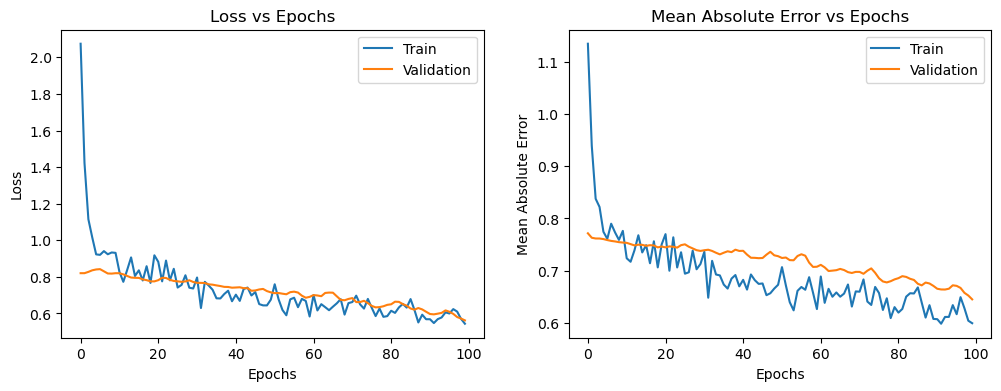

In [ ]:
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

## Callbacks

Monitorear función de pérdidas (loss) y métricas de evaluación 

In [71]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [72]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]


In [73]:
# construir modelo FF nn Sequential
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model.summary()


Model: "sequential_13"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               3712      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 1)                 65        
                                                                 
Total para

In [ ]:

# definir CallBacks

# callbacks en entrenamiento
class TrainingCallBack(Callback):
    
    def on_train_begin(self, logs= None):
        print('Starting training...')
    
    def on_epoch_begin(self, epoch, logs= None):
        print('Starting epoch: ', epoch)
        
    def on_train_batch_begin(self, batch , logs= None):
        print('Starting batch:', batch)

    def on_train_batch_end(self, batch, logs= None):
        print('End batch...')  
        
    def on_epoch_end(self, epoch, logs= None):
        print('End epoch...')
        
    def on_train_end(self, logs= None):
        print('End training...')
        
# callbacks en evaluación
class TestingCallBack(Callback):
    
    def on_test_begin(self, logs= None):
        print('Starting testing...')
        
    def on_test_batch_begin(self, batch , logs= None):
        print('Starting batch:', batch)

    def on_test_batch_end(self, batch, logs= None):
        print('End batch...')  
          
    def on_test_end(self, logs= None):
        print('End testing...')
        
        
# callbacks en predicción
class PredictionCallBack(Callback):
    
    def on_predict_begin(self, logs= None):
        print('Starting prediction...')
        
    def on_predict_batch_begin(self, batch , logs= None):
        print('Starting prediction: batch:', batch)

    def on_prediction_batch_end(self, batch, logs= None):
        print('End prediction: batch...')  
          
    def on_prediction_end(self, logs= None):
        print('End prediction...')
        


In [ ]:
# construir reg model
model_reg = get_reg_model(1e-5, 0.3)

# compilar modelo
model_reg.compile(optimizer='adam', loss='mae')

# entrenar modelo
model_reg.fit(x_train, y_train, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallBack()])

# evaluar modelo
model_reg.evaluate(x_test, y_test, verbose=False, callbacks=[TestingCallBack()])

# predicciones

model_reg.predict(x_test, verbose=False, callbacks=[PredictionCallBack()])

 

In [ ]:

# construir modelo FF nn con BatchNormalization(regularizacion)

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

# compilar modelo
# función de pérdidas (loss)= 'mse'
# optimizer = 'adam'
# métricas de evaluación= 'mae'
model.compile(loss='mse', optimizer="adam", metrics=['mae'])


In [ ]:
# crear Callback personalizada

class LossAndMetricCallback(tf.keras.callbacks.Callback):
    
    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))



In [ ]:
# entrenar modelo
history = model.fit(x_train, y_train, epochs=20,
                    batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:
# evaluar modelo 
model_eval = model.evaluate(x_test, y_test, batch_size=10, 
                            callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:
# predicciones
model_pred = model.predict(test_data, batch_size=10,
                           callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:

# definir tasa de aprendizaje 
# tuplas (start_epoch, new_learning_rate)
lr_schedule = [ (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

In [ ]:

# definir Callback personalizada con tasa de aprendizaje
class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # atributo: nueva tasa de aprendizaje
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # tasa de aprendizaje actual
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))

        # obtener tasa de aprendizaje para el epoch actual
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # set tasa de aprendizaje actual
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [ ]:
# construir modelo
new_model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [ ]:
# compilar modelo
# función pérdidas (loss) = 'mse'
# optimizer = 'adam'
# métricas de evaluación = 'mae', 'mse'
new_model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae', 'mse'])

In [ ]:
# entrenar modelo
new_history = new_model.fit(train_data, train_targets, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

### Early Stopping

Monitorear función de pérdidas (loss) , métricas de evaluación en cada epoch y termina el entrenamiento (regularización)

In [ ]:
# consutrir modelo sin regularizacion
model_noreg = get_model()

# compilar modelo
model_noreg.compile(optimizer='adam', loss='mse')

# entrenar modelo
history = model_noreg.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

# evaluar modelo
model_noreg.evaluate(x_test, y_test)


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 128)               1408      
                                                                 
 dense_229 (Dense)           (None, 128)               16512     
                                                                 
 dense_230 (Dense)           (None, 128)               16512     
                                                                 
 dense_231 (Dense)           (None, 128)               16512     
                                                                 
 dense_232 (Dense)           (None, 128)               16512     
                                                                 
 dense_233 (Dense)           (None, 128)               16512     
                                                                 
 dense_234 (Dense)           (None, 1)               

In [ ]:

# construir modelo regularizado
reg_model = get_reg_model(1e-5, 0.2)

# compilar modelo regularizado
reg_model.compile(optimizer='adam', loss='mse')

# entrenamiento
history_reg = reg_model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

# evaluar modelo
reg_model.evaluate(x_test, y_test, verbose=2)




In [ ]:
# crear modelo Sequential 

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model.summary()

# compilar modelo
model.compile(loss='mse',
                optimizer="adam",metrics=["mse","mae"])



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 128)               1408      
                                                                 
 dense_241 (Dense)           (None, 64)                8256      
                                                                 
 dense_242 (Dense)           (None, 64)                4160      
                                                                 
 dense_243 (Dense)           (None, 64)                4160      
                                                                 
 dense_244 (Dense)           (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# definir función de tasa de aprendizaje schedule
def lr_function(epoch, lr):
    if epoch % 2 == 0:
        return lr
    else:
        return lr + epoch/1000

In [ ]:
# entrenar modelo
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)], verbose=False)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.

Epoch 2: LearningRateScheduler setting learning rate to 0.0020000000474974513.

Epoch 3: LearningRateScheduler setting learning rate to 0.0020000000949949026.

Epoch 4: LearningRateScheduler setting learning rate to 0.005000000094994903.

Epoch 5: LearningRateScheduler setting learning rate to 0.004999999888241291.

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999888241292.

Epoch 7: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 8: LearningRateScheduler setting learning rate to 0.01699999977648258.

Epoch 9: LearningRateScheduler setting learning rate to 0.016999999061226845.

Epoch 10: LearningRateScheduler setting learning rate to 0.025999999061226846.


In [ ]:
# entrenar modelo con LearningRateScheduler con funcion lambda
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)], 
                    verbose=False)


Epoch 1: LearningRateScheduler setting learning rate to 0.3333333333333333.

Epoch 2: LearningRateScheduler setting learning rate to 0.125.

Epoch 3: LearningRateScheduler setting learning rate to 0.07692307692307693.

Epoch 4: LearningRateScheduler setting learning rate to 0.05555555555555555.

Epoch 5: LearningRateScheduler setting learning rate to 0.043478260869565216.

Epoch 6: LearningRateScheduler setting learning rate to 0.03571428571428571.

Epoch 7: LearningRateScheduler setting learning rate to 0.030303030303030304.

Epoch 8: LearningRateScheduler setting learning rate to 0.02631578947368421.

Epoch 9: LearningRateScheduler setting learning rate to 0.023255813953488372.

Epoch 10: LearningRateScheduler setting learning rate to 0.020833333333333332.


In [ ]:
# entrenar modelo con Callback que guarda cada epoch en archivo .csv
# Train the model with a CSV logger

history_csv = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.CSVLogger("results.csv")], verbose=False)

history_df =   pd.read_csv("results.csv", index_col='epoch')
history_df

,loss,mae,mse
epoch,,,
0,1.027811,0.867646,1.027811
1,1.028482,0.868472,1.028482
2,1.027366,0.866784,1.027366
3,1.030710,0.865307,1.030710
4,1.026625,0.865232,1.026625
5,1.027110,0.868661,1.027110
6,1.027413,0.869558,1.027413
7,1.027180,0.868056,1.027180
8,1.027807,0.867877,1.027807


In [ ]:
# crear LambdaCallbacks


epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1)))


batch_loss_callback = tf.keras.callbacks.LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss'])))

train_finish_callback = tf.keras.callbacks.LambdaCallback(
    on_train_end=lambda logs: print('Training finished!'))

history_lambda = model.fit(x_train, y_train, epochs=5, batch_size=100,
                    callbacks=[epoch_callback, batch_loss_callback,train_finish_callback], verbose=False)
history_lambda

Starting Epoch 1!

 After batch 0, the loss is    0.93.

 After batch 1, the loss is    1.04.

 After batch 2, the loss is    1.02.

 After batch 3, the loss is    1.03.
Starting Epoch 2!

 After batch 0, the loss is    0.98.

 After batch 1, the loss is    1.01.

 After batch 2, the loss is    1.05.

 After batch 3, the loss is    1.03.
Starting Epoch 3!

 After batch 0, the loss is    1.06.

 After batch 1, the loss is    1.03.

 After batch 2, the loss is    1.06.

 After batch 3, the loss is    1.03.
Starting Epoch 4!

 After batch 0, the loss is    1.03.

 After batch 1, the loss is    1.04.

 After batch 2, the loss is    1.01.

 After batch 3, the loss is    1.03.
Starting Epoch 5!

 After batch 0, the loss is    1.11.

 After batch 1, the loss is    1.13.

 After batch 2, the loss is    1.04.

 After batch 3, the loss is    1.03.
Training finished!


In [ ]:

# entrenar modelo con Callback ReduceLROnPlateau
history_reducelr = model.fit(x_train, y_train, epochs=100, batch_size=100,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                        monitor="loss",factor=0.2, verbose=1)], verbose=False)

history_reducelr 


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00416666679084301.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0008333333767950535.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00016666667070239783.

Epoch 42: ReduceLROnPlateau reducing learning rate to 3.333333297632635e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 6.666666740784422e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.3333333299669903e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 2.666666659933981e-07.

Epoch 82: ReduceLROnPlateau reducing learning rate to 5.3333332061811235e-08.

Epoch 92: ReduceLROnPlateau reducing learning rate to 1.0666666128145153e-08.


## Validación y Regulación con Iris dataset

### Cargar base de datos Iris dataset 


In [59]:
iris_data = datasets.load_iris()
iris_data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    
    # separar x, y en train-set y test-set
    train_data, test_data, train_targets, test_targets = train_test_split(iris_data.data, iris_data.target, test_size=0.1)
    
    return (train_data, test_data, train_targets, test_targets)

train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)
train_targets
    

array([2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 1])

### Preprocesamiento

* Codificación: aplicar One-Hote encoding a y dependiente en train-set y test-set

In [61]:
# codificar one-hot encoding  en y dependiente
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))
train_targets

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

In [62]:
train_data[0].shape

(4,)

### Construir Modelo 

In [63]:
# construir modelo FF nn Sequential

# input layer: 64 neuronas, activation='relu', input_shape=input_shape
# 4 capas de 128 neuronas, activation='relu'
# 4 capas de 64 neuronsas, activation='relu'
# output layer: 3 neuronas, activation='softmax'

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    
    model = Sequential() # crear modelo Sequential  FFNN
    
    # input layer: 64 neuronas, activation='relu', input_shape=(x_train.shape[1],)
    #
    
    model.add(Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform', bias_initializer='ones' ))
    
    # agregar 4 capas de 128 neuronas 
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    # agregar 4 capas de 64 neuronas
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    
    # output layer: 3 neuronas, activation='softmax'
    model.add(Dense(3, activation='softmax')) # 3 neuronas, activation='relu'
    
    model.summary()
    
    return model
    
model = get_model(train_data[0].shape)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)               

### Entrenamiento

In [64]:
# compilar modelo
# parametros: optimizer='Adam' learning_rate=0.005, función de perdidas 'sparse_categorical_crossentropy', metrica de evaluación 'accuracy'
def compile_model1(model): 
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    # definir parametros de compilar
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    
    # compilar modelo
    model.compile(optimizer=opt,
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    model.summary()
        
compile_model1(model)
    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)               

In [65]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    
    # entrenar/ajustar pesos del modelo
    aprendizaje = model.fit(train_data, train_targets, epochs=epochs, validation_split=0.15, batch_size=40)
    return aprendizaje


history = train_model(model, train_data, train_targets, epochs=800)
history


Epoch 1/800


3/3 [==============================] - 17s 281ms/step - loss: 1.1463 - accuracy: 0.3246 - val_loss: 1.0544 - val_accuracy: 0.3333
Epoch 2/800
3/3 [==============================] - 0s 55ms/step - loss: 0.9962 - accuracy: 0.5965 - val_loss: 0.9901 - val_accuracy: 0.6667
Epoch 3/800
3/3 [==============================] - 0s 73ms/step - loss: 0.9516 - accuracy: 0.6491 - val_loss: 0.9418 - val_accuracy: 0.6667
Epoch 4/800
3/3 [==============================] - 0s 52ms/step - loss: 0.9060 - accuracy: 0.6842 - val_loss: 0.8769 - val_accuracy: 0.8095
Epoch 5/800
3/3 [==============================] - 0s 57ms/step - loss: 0.8533 - accuracy: 0.9298 - val_loss: 0.8159 - val_accuracy: 0.9524
Epoch 6/800
3/3 [==============================] - 0s 45ms/step - loss: 0.8059 - accuracy: 0.9474 - val_loss: 0.7646 - val_accuracy: 0.9524
Epoch 7/800
3/3 [==============================] - 0s 50ms/step - loss: 0.7693 - accuracy: 0.8246 - val_loss: 0.7187 - val_accuracy: 0.9524
Epoch 8/800
3/3 [=============

### Curvas de Aprendizaje

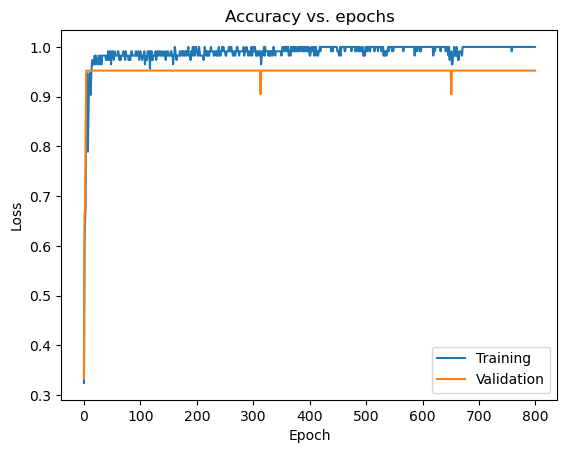

In [66]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

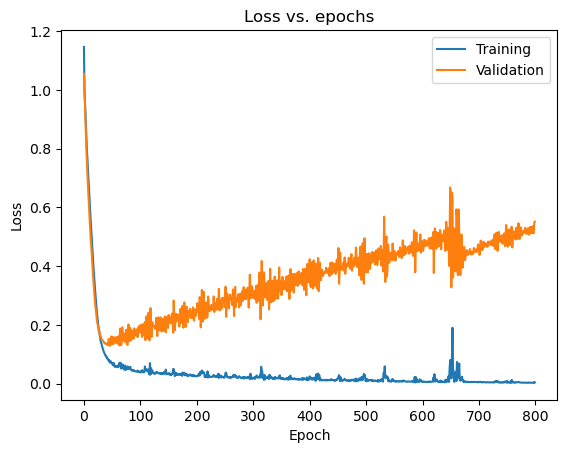

In [67]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Regularización de Modelo

In [ ]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    
    reg_model = Sequential() # crear modelo Sequential  FFNN
    
    # input layer: 64 neuronas, activation='relu', input_shape=(x_train.shape[1],)
    reg_model.add(Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform', bias_initializer='ones', kernel_regularizer=regularizers.l2(weight_decay)))
    
    # agregar 4 capas de 128 neuronas 
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    
    reg_model.add(Dropout(dropout_rate)) # Reg: capa Dropout
   
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    
    reg_model.add(BatchNormalization()) # Reg: capa BatchNormalization
    
    # agregar 4 capas de 64 neuronas
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    
    reg_model.add(Dropout(dropout_rate)) # Reg: capa Dropout
    
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    
    # output layer: 3 neuronas, activation='softmax'
    reg_model.add(Dense(3, activation='softmax')) # 3 neuronas, activation='relu'
    
    reg_model.summary()
    
    return reg_model

    
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                320       
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)              

In [ ]:
# compilar modelo
compile_model1(reg_model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                320       
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)              

In [ ]:
# entrenar modelo

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 11s 1s/step - loss: 2.2904 - accuracy: 0.3158 - val_loss: 2.0232 - val_accuracy: 0.4286
Epoch 2/800
3/3 [==============================] - 0s 95ms/step - loss: 2.2056 - accuracy: 0.3158 - val_loss: 2.0123 - val_accuracy: 0.4286
Epoch 3/800
3/3 [==============================] - 0s 66ms/step - loss: 2.2178 - accuracy: 0.3509 - val_loss: 2.0039 - val_accuracy: 0.4286
Epoch 4/800
3/3 [==============================] - 0s 78ms/step - loss: 2.1822 - accuracy: 0.3246 - val_loss: 1.9979 - val_accuracy: 0.4286
Epoch 5/800
3/3 [==============================] - 0s 68ms/step - loss: 2.1833 - accuracy: 0.3246 - val_loss: 1.9909 - val_accuracy: 0.4286
Epoch 6/800
3/3 [==============================] - 0s 50ms/step - loss: 2.1808 - accuracy: 0.3070 - val_loss: 1.9845 - val_accuracy: 0.4286
Epoch 7/800
3/3 [==============================] - 0s 86ms/step - loss: 2.1133 - accuracy: 0.3333 - val_loss: 1.9801 - val_accuracy: 0.4286
Epoch 8/800
3/3 [====

### Curvas de Aprendizaje: Accuracy y Loss

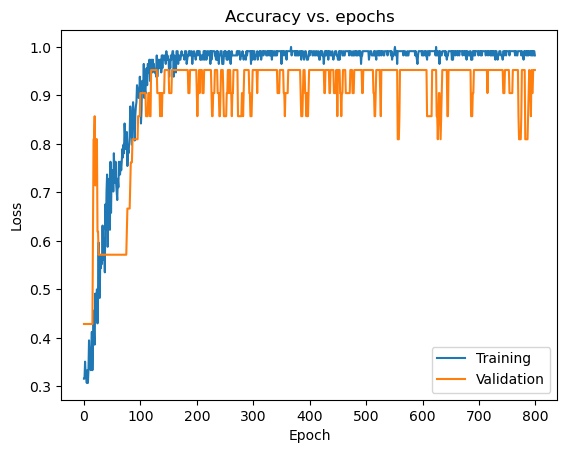

In [ ]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

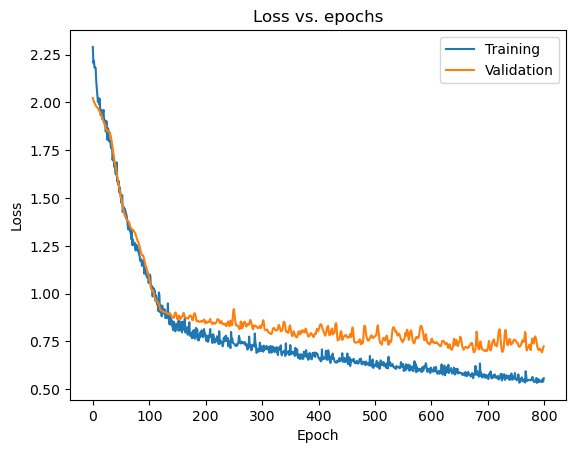

In [ ]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Callbacks

In [68]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    
    # crear EarlyStopping callback
    # parametros: monitor='val_loss', mode='min', patience=30
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)

    # crear ReduceLROnPlateau callback
    # parametros: monitor='val_loss', factor=0.2, patience=20
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20)

    return early_stopping, learning_rate_reduction



In [ ]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model1(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                320       
                                                                 
 dense_71 (Dense)            (None, 128)               8320      
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_4 (Bat  (None, 128)              

In [ ]:
learning_rate_reduction.patience

20

### Curvas de Aprendizaje

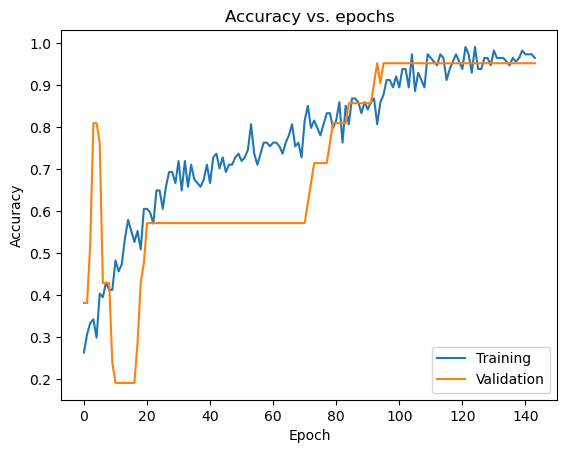

In [ ]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

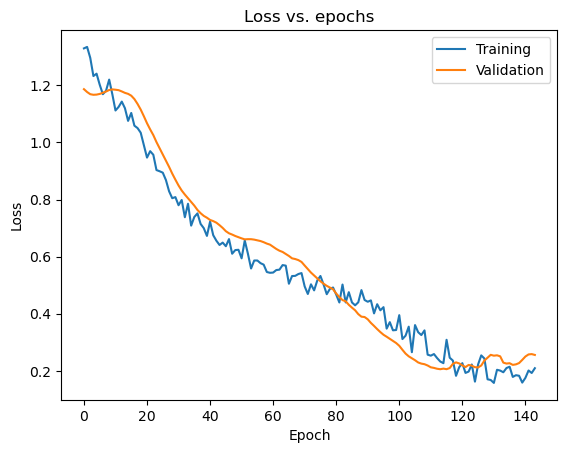

In [ ]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Evaluación

In [ ]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.234
Test accuracy: 93.33%


## Sintonización de Redes Neuronales

In [79]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [80]:
import keras_tuner as kt

# funcion: construir modelo de red neuronal
# numero de capas escondidas: min 0, max 8
# numero de neuronas: min 16, max 256
# tasa de aprendizaje: min 1e-4, max 1e-2
# optimizador:  ["sgd", "adam"]
# 


def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential() # agregar modelo Sequential
    model.add(tf.keras.layers.Flatten())# agregar capa plana 1xN}
    
    for _ in range(n_hidden): # iterar sobre numero de capas escondidas/ocultas
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu")) # agregar capa densa
    
    # capa de salida
    # numero de neuronas: 10 (10 clases)
    # activacion: softmax
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    # compilar modelo
    # loss function(funcion de perdidas):  sparse_categorical_crossentropy (multi clase)
    # metrica de evaluacion: accuracy (error)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [81]:
# crear sintonizador de hiper parametros RandomSearch
# modelo: build model
# scoring/objective: val_accuracy
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

# buscar/ajustar hiper parametros con datos de entrenamiento
# epochs: 10
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.8371999859809875

Best val_accuracy So Far: 0.8615999817848206
Total elapsed time: 00h 02m 34s


In [82]:
# extraer mejores modelos sintonizados
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [83]:
# parametros del mejor modelo
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [84]:
# mejor iteracion de sintonizacion
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8615999817848206


In [85]:
best_trial.metrics.get_last_value("val_accuracy")

0.8615999817848206

In [86]:
# entrenar mejor modelo
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3440 - accuracy: 0.8739
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8767
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3249 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3182 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8858
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3030 - accuracy: 0.8892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8902
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.8927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.8941
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3898 

In [87]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)
    
    
    

In [88]:
# crear sintonizador de hiper parametros
# Hyperband
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [ ]:
from pathlib import Path

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard" # path de Hyperband
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)

# crear Callback EarlyStopping
# patience: 2  (espera 2 iteraciones)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

In [ ]:

bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

## Guardar y cargar modelos

### Cargar bases de datos

In [13]:
def load_cifar():
    
    # cargar base de datos CIFAR-10
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    # re-escalar pixeles
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_test = x_test[:1000]
    y_test = y_test[:1000]
    
    
        

In [14]:
# Import the CIFAR-10 dataset and rescale the pixel values

# cargar base de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Preprocesamiento:

* Re-escalar pixeles
* Muestrear datos

In [15]:
# re-escalar pixeles
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

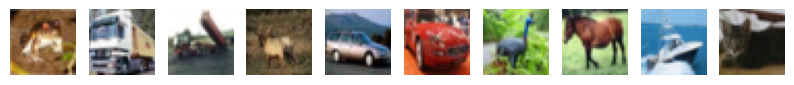

In [16]:
# plot imagenes
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

### Funciones:

* Test Accuracy
* Construir modelo


In [70]:
# evaluar modelo: loss y accuracy en test-set 
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [18]:
# construir modelo CNN

# arquitectura
# input layer:  Conv, filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3)

# capa Conv, filters=8, activation='relu', kernel_size=(3, 3)
# capa pooling: pool_size=(4, 4)
# capa flatten: 1xN
# capas Densa: 32 neuronas, activation='relu'

# output layer:  Densa, 10 neuronas, activation='softmax'

# compilar modelo
# parametros: optimizer='adam', loss='sparse_categorical_crossentropy', metrica= 'accuracy'

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [19]:
model  = get_new_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [20]:
# evaluar modelo
get_test_accuracy(model, x_test, y_test)

accuracy: 0.105


### Checkpoints

In [21]:
# crear checkpoint
checkpoint_path = 'model_checkpoints/chekpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             frequency = 'epoch',
                             save_weights_only = True,
                             verbose=1)

checkpoint

### Entrenamiento

In [22]:
# entrenar modelo con Checkpoint Callback
model.fit(x_train, y_train, epochs=3,callbacks=[checkpoint])

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.9700 - accuracy: 0.2668
Epoch 1: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 19s 48ms/step - loss: 1.9700 - accuracy: 0.2670
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.6324 - accuracy: 0.3985
Epoch 2: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 14s 45ms/step - loss: 1.6327 - accuracy: 0.3986
Epoch 3/3
313/313 [==============================] - ETA: 0s - loss: 1.5063 - accuracy: 0.4518
Epoch 3: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 15s 47ms/step - loss: 1.5063 - accuracy: 0.4518


### Evaluar modelo

In [23]:
# evaluar accuracy de modelo en test-set
get_test_accuracy(model, x_test, y_test)


accuracy: 0.457


In [24]:
# crear nuevo modelo
model = get_new_model() # crear CNN
get_test_accuracy(model, x_test, y_test) # evaluar accuracy de modelo


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [25]:
# cargar pesos de modelo pre-entrenado
model.load_weights(checkpoint_path) # cargar pesos a CNN con modelo pre-entrenado
get_test_accuracy(model, x_test, y_test) # evaluar modelo pre-entrenado cargado


accuracy: 0.457


## Checkpoints

In [26]:

# crear Checkpoint Callback
checkpoint_5000_path = 'model_checkpoints_5000/checkp_{epoch:02d}_{batch:04d}'

#  filepath=path, guardar solo los pesos, save_freq = 5000 
checkpoint_5000= ModelCheckpoint(filepath=checkpoint_5000_path,
                                       save_weights_only= True,
                                       save_freq = 5000,
                                       verbose=1)
checkpoint_5000

In [27]:
# crear modelo CNN 
model_check1 = get_new_model() # crear modelo CNN

# entrenar modelo con Checkpoint Callback
model_check1.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_5000])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [84]:
# crear modelo sin entrenar
model_untrain = get_new_model()
model_untrain


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [85]:
# crear Checkpoint Callback que monitorea la accuracy en validacion

checkp_best_path = 'model_checkpoints_best/checkpoint' # path de Checkpoin

# crear Checkpoint Callback
# parametros: guardar solo pesos de modelo, monitorear val_accuracy, guardar SOLO mejor modelo

checkp_best = ModelCheckpoint(filepath=checkp_best_path,
                              save_weights_only = True,
                              save_freq='epoch',
                              monitor='val_accuracy',
                              save_best_only = True,
                              verbose = 1)
checkp_best


In [86]:
# entrenar modelo y guardar pesos con mayor val_accuracy
history = model_untrain.fit(x_train, y_train,
                            epochs=50,
                            validation_data = (x_test, y_test),
                            batch_size= 10,
                            callbacks = [checkp_best],
                            verbose=1)


Epoch 1/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.8638 - accuracy: 0.3154
Epoch 1: val_accuracy improved from -inf to 0.43200, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 22s 18ms/step - loss: 1.8636 - accuracy: 0.3155 - val_loss: 1.6036 - val_accuracy: 0.4320
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 1.5345 - accuracy: 0.4421
Epoch 2: val_accuracy improved from 0.43200 to 0.45400, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 20s 20ms/step - loss: 1.5345 - accuracy: 0.4421 - val_loss: 1.4826 - val_accuracy: 0.4540
Epoch 3/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.4015 - accuracy: 0.4996
Epoch 3: val_accuracy improved from 0.45400 to 0.49000, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 21s 21ms/step - loss: 1.4013 - accuracy: 0.4996 - val_loss: 1.4253 - val_acc

KeyboardInterrupt: 

<Axes: >

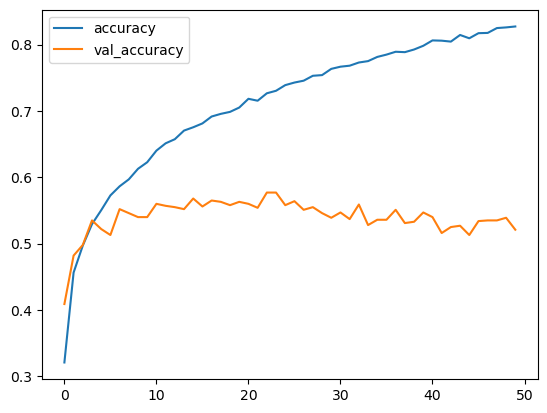

In [ ]:
# evaluar modelo
df = pd.DataFrame(history.history)
df.plot(y=['accuracy','val_accuracy'])


### Guardar modelo completo

In [57]:
# cargar base de datos CIFAR-10
load_cifar()


NameError: name 'load_cifar' is not defined

In [ ]:
# crear 

chckp_path1 = 'model_checkp'
checkp1 = ModelCheckpoint(filepath=chckp_path1,
                          save_weights=False,
                          frequency='epoch',
                          verbose=1)

checkp1


In [ ]:
# crear y entrenar modelo
m_save1 = get_new_model()
m_save1.fit(x_train,y_train,epochs=3,callbacks=[checkp1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 29s 79ms/step - loss: 2.0033 - accuracy: 0.2661
Epoch 2/3
313/313 [==============================] - ETA: 0s - loss: 1.5795 - accuracy: 0.4267
Epoch 2: saving model to model_checkp
INFO:tensorflow:Assets written to: model_checkp\assets


INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 18s 59ms/step - loss: 1.5795 - accuracy: 0.4267
Epoch 3/3
312/313 [============================>.] - ETA: 0s - loss: 1.4337 - accuracy: 0.4844
Epoch 3: saving model to model_checkp
INFO:tensorflow:Assets written to: model_checkp\assets


INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 23s 73ms/step - loss: 1.4337 - accuracy: 0.4845


In [ ]:
# evaluar modelo
get_test_accuracy(m_save1, x_test, y_test)

accuracy: 0.501


In [ ]:
del m_save1 # eliminar modelo

In [ ]:
# cargar modelo y evaluar modelo
model = load_model(chckp_path1)
get_test_accuracy(model, x_test, y_test)



accuracy: 0.501


### Guardar modelo en formato .h5

In [ ]:
model.save('m1.h5') # guardar modelo en formato .h5
load_model1 = load_model('m1.h5') # cargar modelo guardado
get_test_accuracy(load_model1, x_test, y_test) # evaluar modelo guardado

c:\Users\Diego\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


accuracy: 0.501


### Guardar arquitectura de modelo

In [ ]:
# obtener arquitectura (config) del modelo
arqui = model.get_config()

# crear modelo con arquitectura por parametro
new_model_arqui1 = tf.keras.Sequential.from_config(arqui)

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv_1_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv_1',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 32, 32, 3),
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint'

In [ ]:
# guardar arquitectura en formatos JSON y YAML
json_arqu = model.to_json()
#yaml_string = model.to_yaml()


# Write out JSON config file

with open('config.json', 'w') as f:
    json.dump(json_arqu, f)
del json_arqu

# Read in JSON config file again

with open('config.json', 'r') as f:
    json_arqu = json.load(f)


## Cargar modelo pre-entrenados en Keras

In [40]:
# modelo RestNet 50 pre-entrenado de Keras
model_res50 = ResNet50(weights='imagenet')
model_res50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [41]:
# importar, cargar y preprocesamiento de 3 imagenes de prueba para clasificación
lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))


In [48]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# generar top 5 predicciones
def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] # convertir x a array
    x = preprocess_input(x) # preprocesar imagen
    
    # top5 predicciones
    preds = decode_predictions(model_res50.predict(x), top=5) 
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        # mostrar prediccion y probabilidad
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds



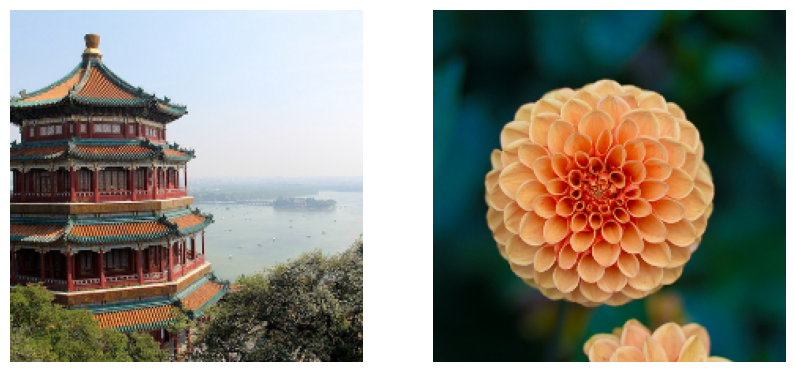

In [49]:
# extra code – displays the cropped and resized images

plt.figure(figsize=(10, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_resized[idx] / 255)
    plt.axis("off")

plt.show()

### Predicciones 


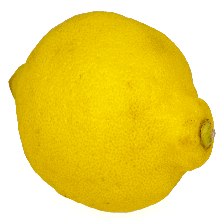

In [43]:
lemon_img

In [6]:
get_top_5_predictions(lemon_img)

35363/35363 [==============================] - 0s 0us/step


,prediction,probability
1,lemon,0.994783
2,tennis_ball,0.004434
3,orange,0.000595
4,ping-pong_ball,0.000032
5,banana,0.000023


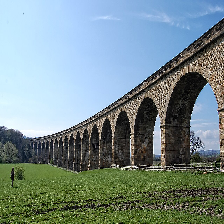

In [7]:
viaduct_img

In [44]:
get_top_5_predictions(viaduct_img)


1/1 [==============================] - 1s 1s/step


,prediction,probability
1,viaduct,0.999948
2,steel_arch_bridge,0.000029
3,pier,0.000011
4,bell_cote,0.000006
5,dam,0.000001


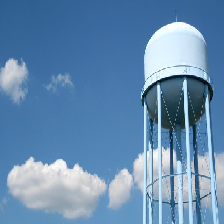

In [10]:
water_tower_img

In [11]:
get_top_5_predictions(water_tower_img)

1/1 [==============================] - 0s 150ms/step


,prediction,probability
1,water_tower,0.999969
2,chime,0.000023
3,spotlight,0.000002
4,airship,0.000001
5,beacon,0.000001


In [12]:
colibri_img = load_img('data/colibri.jpg', target_size=(224, 224))
get_top_5_predictions(colibri_img)

1/1 [==============================] - 0s 153ms/step


,prediction,probability
1,hummingbird,0.999707
2,fly,0.000149
3,jacamar,0.000132
4,peacock,0.000008
5,bee_eater,0.000002


### Predicciones de muestra

In [ ]:
#colibri_img = load_img('colibri.jpg', target_size=(224, 224))
#get_top_5_predictions(colibri_img)

## Transfer Learning: modelos pre-entrenados

## TensorFlow Hub

In [13]:
# cargar modelo de Google MobileNet V1 de TensorFlow Hub
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
Total params: 1343049 (5.12 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1343049 (5.12 MB)
_________________________________________________________________


In [ ]:
# importar, cargar y preprocesamiento de 3 imagenes de prueba para clasificación
lemon_img = load_img('data/lemon.jpg', target_size=(160,160))
viaduct_img = load_img('data/viaduct.jpg', target_size=(160,160))
water_tower_img = load_img('data/water_tower.jpg', target_size=(160,160))


## Reutilizar Capas Pre-entrenadas

In [50]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# pre-procesamiento
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [9]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

# dividir bases de datos
def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

# obtener bases de datos de entrenamiento, validación y prueba
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


Epoch 1/20
1376/1376 [==============================] - 4s 3ms/step - loss: 1.2914 - accuracy: 0.5996 - val_loss: 0.7661 - val_accuracy: 0.7618
Epoch 2/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.6391 - accuracy: 0.7876 - val_loss: 0.5432 - val_accuracy: 0.8188
Epoch 3/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.5014 - accuracy: 0.8376 - val_loss: 0.4573 - val_accuracy: 0.8471
Epoch 4/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.4330 - accuracy: 0.8572 - val_loss: 0.4066 - val_accuracy: 0.8649
Epoch 5/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3912 - accuracy: 0.8694 - val_loss: 0.3750 - val_accuracy: 0.8706
Epoch 6/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3633 - accuracy: 0.8768 - val_loss: 0.3537 - val_accuracy: 0.8794
Epoch 7/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3436 - accuracy: 0.8824 - val_loss: 0.3382 - val_accuracy:

INFO:tensorflow:Assets written to: my_model_A\assets


In [10]:
tf.random.set_seed(42)

# crear modelo A: Sequential 

# capa de entrada :  capa plana 1xN, input_shape: [28, 28]

# capas densas: 3 capas,  100 unidades, activacion= relu, kernel_initializer="he_normal"

# capa de salida : Densa 8 unidades(clases), activacion= softmax

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    
    
    tf.keras.layers.Dense(8, activation="softmax")
])


# compilar modelo
# loss funcion (funcion de pérdidas): sparse_categorical_crossentropy
# optimizer: SGD (tasa de aprendizaje= 0.001)
# metricas de evaluacion: accuracy
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")

Epoch 1/20
1376/1376 [==============================] - 3s 2ms/step - loss: 1.1653 - accuracy: 0.6210 - val_loss: 0.7078 - val_accuracy: 0.7516
Epoch 2/20
1376/1376 [==============================] - 3s 2ms/step - loss: 0.6149 - accuracy: 0.7884 - val_loss: 0.5281 - val_accuracy: 0.8230
Epoch 3/20
1376/1376 [==============================] - 3s 2ms/step - loss: 0.4946 - accuracy: 0.8383 - val_loss: 0.4510 - val_accuracy: 0.8521
Epoch 4/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.4317 - accuracy: 0.8582 - val_loss: 0.4052 - val_accuracy: 0.8674
Epoch 5/20
1376/1376 [==============================] - 3s 2ms/step - loss: 0.3925 - accuracy: 0.8695 - val_loss: 0.3763 - val_accuracy: 0.8734
Epoch 6/20
1376/1376 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8770 - val_loss: 0.3554 - val_accuracy: 0.8784
Epoch 7/20
1376/1376 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.8837 - val_loss: 0.3384 - val_accuracy:

INFO:tensorflow:Assets written to: my_model_A\assets


In [11]:
# extra code – train and evaluate model B, without reusing model A

tf.random.set_seed(42)

# crear modelo B: Sequential 

# capa de entrada :  capa plana 1xN, input_shape: [28, 28]

# capas densas: 3 capas,  100 unidades, activacion= relu, kernel_initializer="he_normal"

# capa de salida : Densa 1 unidad, activacion= sigmoide

model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# compilar modelo
# loss funcion (funcion de pérdidas): binary_crossentropy (clasificacion binaria)
# optimizer: SGD (tasa de aprendizaje= 0.001)
# metricas de evaluacion: accuracy
model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 1s 51ms/step - loss: 0.7657 - accuracy: 0.3950 - val_loss: 0.7350 - val_accuracy: 0.4491
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.7282 - accuracy: 0.4250 - val_loss: 0.7050 - val_accuracy: 0.4995
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6956 - accuracy: 0.4950 - val_loss: 0.6781 - val_accuracy: 0.5717
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6649 - accuracy: 0.6300 - val_loss: 0.6569 - val_accuracy: 0.6469
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 0.6413 - accuracy: 0.6800 - val_loss: 0.6357 - val_accuracy: 0.7132
Epoch 6/20
7/7 [==============================] - 0s 34ms/step - loss: 0.6179 - accuracy: 0.7500 - val_loss: 0.6163 - val_accuracy: 0.7567
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.5968 - accuracy: 0.7850 - val_loss: 0.5980 - val_accuracy: 0.7834
Epoch 8/20
7/7 [===========

[0.451007604598999, 0.9164999723434448]

In [15]:
model_A.layers

In [13]:
 tf.keras.Sequential(model_A.layers[:-1]).summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
Total params: 98700 (385.55 KB)
Trainable params: 98700 (385.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# cargar modelo A pre-entrenado
model_A = tf.keras.models.load_model("my_model_A")
# quitar la última capa (capa de salida) de modelo A pre-entrenado
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
# agregar la capa de salida: Densa, 1 unidad, activación sigmoide
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [17]:
tf.random.set_seed(42)  # extra code – ensure reproducibility

In [19]:
# clonar modelo A
model_A_clone = tf.keras.models.clone_model(model_A)
# agregar pesos de modelo A
model_A_clone.set_weights(model_A.get_weights())

# extra code – creating model_B_on_A just like in the previous cell
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [22]:
for layer in model_B_on_A.layers[:-1]: # iterar sobre capas excepto la última capa
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])


history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))
# evaluar modelo final
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/4


7/7 [==============================] - 1s 48ms/step - loss: 0.2616 - accuracy: 0.9550 - val_loss: 0.2963 - val_accuracy: 0.9416
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 0.2598 - accuracy: 0.9600 - val_loss: 0.2955 - val_accuracy: 0.9416
Epoch 3/4
7/7 [==============================] - 0s 19ms/step - loss: 0.2588 - accuracy: 0.9600 - val_loss: 0.2942 - val_accuracy: 0.9407
Epoch 4/4
7/7 [==============================] - 0s 22ms/step - loss: 0.2573 - accuracy: 0.9600 - val_loss: 0.2932 - val_accuracy: 0.9407
Epoch 1/16
7/7 [==============================] - 1s 45ms/step - loss: 0.2557 - accuracy: 0.9600 - val_loss: 0.2901 - val_accuracy: 0.9357
Epoch 2/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2507 - accuracy: 0.9450 - val_loss: 0.2833 - val_accuracy: 0.9387
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2441 - accuracy: 0.9500 - val_loss: 0.2756 - val_accuracy: 0.9416
Epoch 4/16
7/7 [=========================

[0.24373508989810944, 0.9375]

## Optimizadores 

In [24]:
# extra code – a little function to test an optimizer on Fashion MNIST

# crear modelo Sequential
# capa de entrada: capa plana  1xN, input_shape[28, 28]) 
# capas conectadas: capas densas, 100 unidades, activacion=relu, kernel_initializer="he_normal"
# capa de salida: densa, 10 unidades (clases), activacion=softmax
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        
        tf.keras.layers.Dense(10, activation="softmax")
    ])

# compilar modelo
# loss funcion(funcion de pérdidas): "sparse_categorical_crossentropy"
# metricas de evaluacion:   accuracy

# entrenar/ajustar modelo
# epochs: 10
def build_and_train_model(optimizer):
    model = build_model() # construir model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_sgd = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7172 - accuracy: 0.7570 - val_loss: 0.5114 - val_accuracy: 0.8124
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4713 - accuracy: 0.8353 - val_loss: 0.4453 - val_accuracy: 0.8378
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4268 - accuracy: 0.8500 - val_loss: 0.4047 - val_accuracy: 0.8530
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8607 - val_loss: 0.3864 - val_accuracy: 0.8580
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8670 - val_loss: 0.3737 - val_accuracy: 0.8618
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8703 - val_loss: 0.3711 - val_accuracy: 0.8652
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3476 - accuracy: 0.8757 - val_loss: 0.3734 - val_accuracy:

###  Optimización de Momentum

In [25]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [26]:
history_momentum = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6950 - accuracy: 0.7590 - val_loss: 0.5047 - val_accuracy: 0.8186
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4693 - accuracy: 0.8357 - val_loss: 0.4463 - val_accuracy: 0.8378
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4230 - accuracy: 0.8504 - val_loss: 0.4133 - val_accuracy: 0.8544
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8603 - val_loss: 0.3872 - val_accuracy: 0.8584
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8666 - val_loss: 0.3726 - val_accuracy: 0.8648
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3628 - accuracy: 0.8700 - val_loss: 0.3699 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3472 - accuracy: 0.8752 - val_loss: 0.3607 - val_accuracy:

###  Gradiente Nesterov Accelerado

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

history_nesterov = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7050 - accuracy: 0.7589 - val_loss: 0.4958 - val_accuracy: 0.8216
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4616 - accuracy: 0.8373 - val_loss: 0.4385 - val_accuracy: 0.8424
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8519 - val_loss: 0.4101 - val_accuracy: 0.8548
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.8619 - val_loss: 0.3832 - val_accuracy: 0.8606
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3714 - accuracy: 0.8679 - val_loss: 0.3719 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3576 - accuracy: 0.8708 - val_loss: 0.3822 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8763 - val_loss: 0.3684 - val_accuracy:

###  AdaGrad

In [28]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9965 - accuracy: 0.6779 - val_loss: 0.6783 - val_accuracy: 0.7730
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6355 - accuracy: 0.7850 - val_loss: 0.5825 - val_accuracy: 0.7984
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5711 - accuracy: 0.8070 - val_loss: 0.5400 - val_accuracy: 0.8170
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5360 - accuracy: 0.8184 - val_loss: 0.5150 - val_accuracy: 0.8266
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5126 - accuracy: 0.8266 - val_loss: 0.4959 - val_accuracy: 0.8290
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4954 - accuracy: 0.8317 - val_loss: 0.4830 - val_accuracy: 0.8332
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4822 - accuracy: 0.8357 - val_loss: 0.4731 - val_accuracy:

### RMSProp

In [29]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)  # extra code


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5170 - accuracy: 0.8126 - val_loss: 0.4708 - val_accuracy: 0.8232
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3903 - accuracy: 0.8592 - val_loss: 0.4170 - val_accuracy: 0.8454
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8690 - val_loss: 0.3862 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3557 - accuracy: 0.8741 - val_loss: 0.3867 - val_accuracy: 0.8690
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3494 - accuracy: 0.8780 - val_loss: 0.3841 - val_accuracy: 0.8694
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3522 - accuracy: 0.8768 - val_loss: 0.4498 - val_accuracy: 0.8540
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3515 - accuracy: 0.8793 - val_loss: 0.4413 - val_accuracy:

### Adam Optimizer

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
history_adam = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5008 - accuracy: 0.8196 - val_loss: 0.4137 - val_accuracy: 0.8378
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8618 - val_loss: 0.4021 - val_accuracy: 0.8442
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3412 - accuracy: 0.8746 - val_loss: 0.3491 - val_accuracy: 0.8742
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8840 - val_loss: 0.3538 - val_accuracy: 0.8694
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.8877 - val_loss: 0.3302 - val_accuracy: 0.8770
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2839 - accuracy: 0.8937 - val_loss: 0.3323 - val_accuracy: 0.8782
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.8981 - val_loss: 0.3507 - val_accuracy:

#### Adamax

In [32]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)
history_adamax = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5388 - accuracy: 0.8105 - val_loss: 0.4429 - val_accuracy: 0.8344
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8577 - val_loss: 0.3929 - val_accuracy: 0.8512
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3594 - accuracy: 0.8696 - val_loss: 0.3642 - val_accuracy: 0.8658
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8793 - val_loss: 0.3461 - val_accuracy: 0.8716
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3140 - accuracy: 0.8864 - val_loss: 0.3268 - val_accuracy: 0.8750
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3000 - accuracy: 0.8901 - val_loss: 0.3398 - val_accuracy: 0.8780
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8943 - val_loss: 0.3371 - val_accuracy:

#### Nadam 

In [33]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)
history_nadam = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.4858 - accuracy: 0.8277 - val_loss: 0.4166 - val_accuracy: 0.8426
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.8663 - val_loss: 0.3902 - val_accuracy: 0.8462
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3340 - accuracy: 0.8783 - val_loss: 0.3478 - val_accuracy: 0.8772
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8850 - val_loss: 0.3418 - val_accuracy: 0.8730
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8893 - val_loss: 0.3244 - val_accuracy: 0.8784
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2790 - accuracy: 0.8955 - val_loss: 0.3559 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.8999 - val_loss: 0.3426 - val_accuracy:

#### AdamW

In [35]:
import tensorflow_addons as tfa

optimizer = tfa.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                 beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)  # extra code

c:\Users\dfoso\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8203 - val_loss: 0.4558 - val_accuracy: 0.8158
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8611 - val_loss: 0.3855 - val_accuracy: 0.8502
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3401 - accuracy: 0.8746 - val_loss: 0.3494 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3173 - accuracy: 0.8833 - val_loss: 0.3599 - val_accuracy: 0.8672
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8869 - val_loss: 0.3298 - val_accuracy: 0.8766
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.8923 - val_loss: 0.3434 - val_accuracy: 0.8742
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2748 - accuracy: 0.8963 - val_loss: 0.3553 - val_accuracy:

#### Curvas de Aprendizaje: Optimizadores  

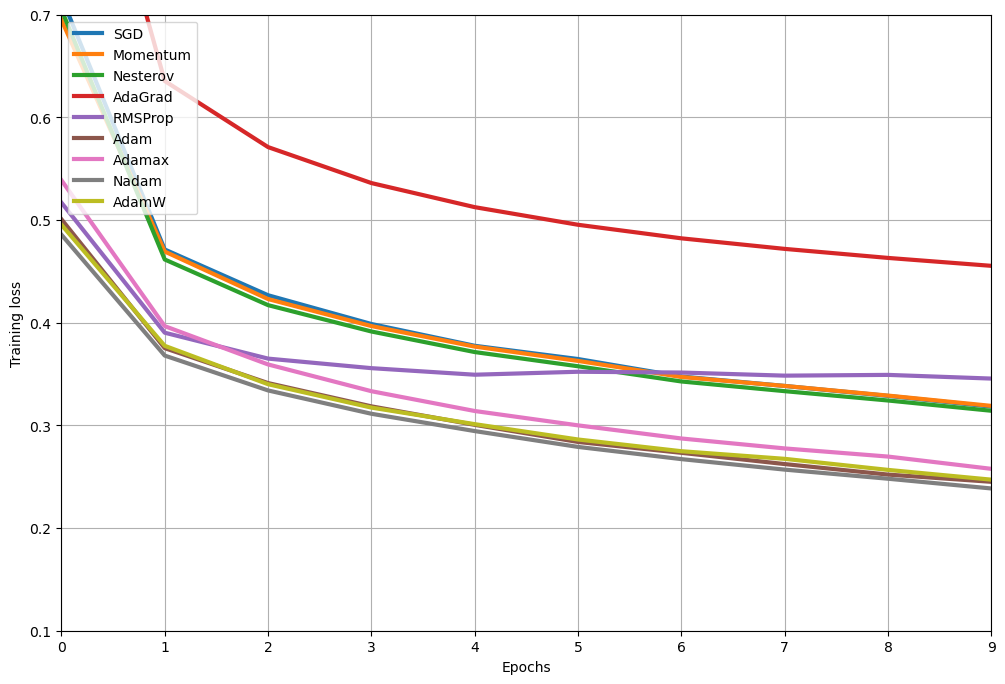

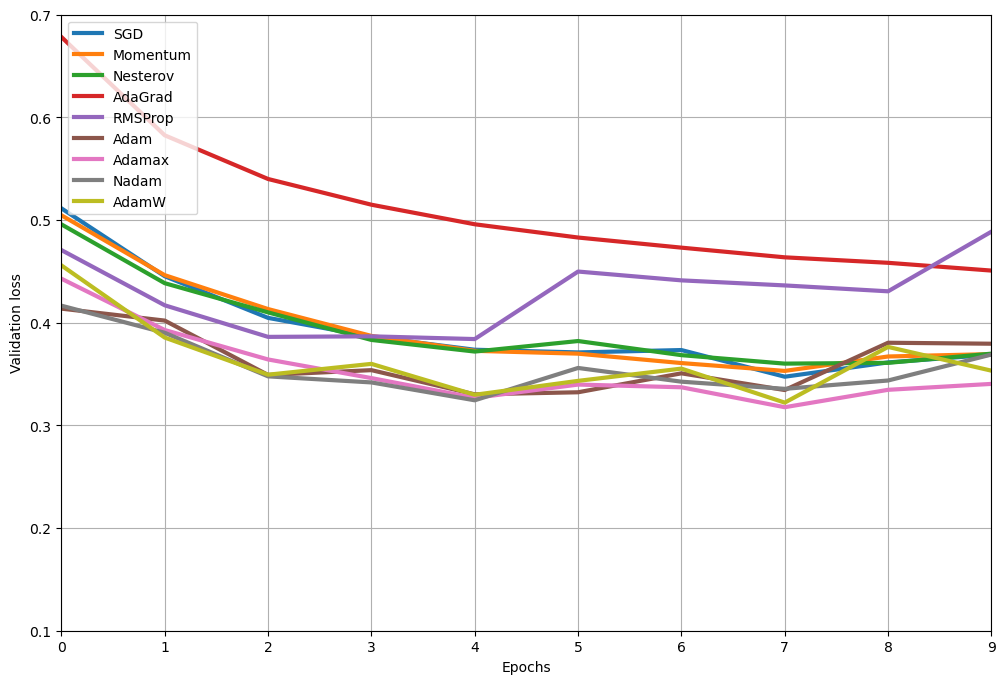

In [37]:
# extra code – visualize the learning curves of all the optimizers

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)
        
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

## Guardar y cargar modelos pre-entrenados con CNN para clasificación de imágenes satelitales

### Cargar bases de datos

In [22]:
def load_eurosat_data():
    data_dir = ''
    x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    x_test  = np.load(os.path.join(data_dir, 'x_test.npy'))
    y_test  = np.load(os.path.join(data_dir, 'y_test.npy'))
    return (x_train, y_train), (x_test, y_test)



### Preprocesamiento

In [21]:
(x_train, y_train), (x_test, y_test) = load_eurosat_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0].shape)
print(x_train.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'x_train.npy'

### Construir modelo

In [17]:

def get_new_model(input_shape):
    model = Sequential() # crear modelo
    
    # input layer: capa convolucional 16 filtros, input_shape=input_shape, kernel 3x3
    # activation='relu', padding SAME
    model.add(Conv2D(filters=16, input_shape=input_shape, kernel_size=(3, 3), 
               activation='relu', padding='same', name='conv_1'))
    
    # capa convolucional: capa convolucional 8 filtros, kernel 3x3
    # activation='relu', padding SAME
    model.add(Conv2D(filters=8, kernel_size=(3, 3), 
               activation='relu', padding='same', name='conv_2'))
   
    # capa pooling(regularizacion): tamaño de pool 4x4
    model.add(MaxPooling2D(pool_size=(8, 8), name='pool_1'))
    
    # capa Flatten: 1xN
    model.add(Flatten(name='flatten')) 
    
    # capa Densa: 32 neuronas, activation='relu' 
    model.add(Dense(32,activation='relu',name='dense_1'))
    
    # output layer: 10 neuronas, activation='softmax'
    model.add(Dense(10,activation='softmax',name='dense_2'))
    
    # compilar modelo
    # parametros: optimizer='adam', loss='sparse_categorical_crossentropy', evaluacion accuracy
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model
    
model = get_new_model(x_train[0].shape)
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 8, 8, 8)           0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 18354 (71.70 KB)
Trainable params: 18354

In [7]:
# evaluar modelo
get_test_accuracy(model, x_test, y_test)


accuracy: 0.108


### Checkpoints



In [22]:

def get_checkpoint_every_epoch():
    """
    This function should return a ModelCheckpoint object that:
    - saves the weights only at the end of every epoch
    - saves into a directory called 'checkpoints_every_epoch' inside the current working directory
    - generates filenames in that directory like 'checkpoint_XXX' where
      XXX is the epoch number formatted to have three digits, e.g. 001, 002, 003, etc.
    """
    # crear Checkpoint Callback
    checkpoint_filename = './checkpoints_every_epoch/checkpoint_{epoch:03d}' # path
    
    #checkpoint_filename =  checkpoint_dir + '/checkpoint_{epoch:03d}' # nombre del archivo
    
    #checkpoint_path = '/checkpoint_{epoch:03d}'
    
    # crear directorio de Checkpoints 
    #os.makedirs(checkpoint_dir, exist_ok=True)
    
    # crear Checkpoint:
    # filepath=checkpoint_filename, save_weights_only=True en cada epoch
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                                 save_weights_only=True,
                                 save_freq='epoch')
    return checkpoint
    
def get_checkpoint_best_only():
    """
    This function returns a ModelCheckpoint object that:
    - saves only the weights that generate the highest validation (testing) accuracy
    - saves into a directory called 'checkpoints_best_only' inside the current working directory
    - generates a file called 'checkpoints_best_only/checkpoint'
    """
    checkpoint_filename = './checkpoints_best_only/best_checkpoint'
    #checkpoint_filename = checkpoint_dir + '/checkpoint'
    
    #checkpoint_path = '/checkpoint'

    # Create the directory if it doesn't exist
    #os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Create and return the ModelCheckpoint object with 'save_best_only' set to True
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                                 save_weights_only=True, 
                                 save_best_only=True,
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_freq='epoch',
                                 save_best_freq='epoch', 
                                 verbose=1, 
                                 validation_data=(x_test, y_test))
    return checkpoint

    
def get_early_stopping():
    """
    This function should return an EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    """
    checkpoint = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
    return checkpoint

In [23]:
# crear Checkpoints callbacks
# crear directorio de Checkpoints 

checkpoint_every_epoch = get_checkpoint_every_epoch()
checkpoint_best_only = get_checkpoint_best_only()
early_stopping = get_early_stopping()

checkpoint_every_epoch

### Entrenar modelo

In [24]:
# lista de Checkpoint Callbacks
callbacks = [checkpoint_every_epoch, checkpoint_best_only, early_stopping]
# entrenar modelo    con lista de Callback
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 1.9442 - accuracy: 0.2840
Epoch 1: val_accuracy improved from -inf to 0.42000, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 32s 205ms/step - loss: 1.9442 - accuracy: 0.2840 - val_loss: 1.6482 - val_accuracy: 0.4200
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 1.5171 - accuracy: 0.4498
Epoch 2: val_accuracy improved from 0.42000 to 0.49700, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 27s 214ms/step - loss: 1.5171 - accuracy: 0.4498 - val_loss: 1.4094 - val_accuracy: 0.4970
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 1.3715 - accuracy: 0.4952
Epoch 3: val_accuracy improved from 0.49700 to 0.51500, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 23s 181ms/step - loss: 1.3715 - accuracy: 0.4952 - val_loss: 1.3108 

In [11]:
def get_model_last_epoch(model):
    """
    This function should create a new instance of the CNN you created earlier,
    load on the weights from the last training epoch, and return this model.
    """
    
    model_last_epoch = clone_model(model)
    latest_checkpoint = tf.train.latest_checkpoint('checkpoints_every_epoch')
    model_last_epoch.load_weights(latest_checkpoint)
    
    return model_last_epoch
    
    
    
def get_model_best_epoch(model):
    """
    This function should create a new instance of the CNN you created earlier, load 
    on the weights leading to the highest validation accuracy, and return this model.
    """
    
    model_best_epoch = clone_model(model)
    best_checkpoint = tf.train.latest_checkpoint('checkpoints_best_only')
    model_best_epoch.load_weights(best_checkpoint)
    
    return model_best_epoch

In [12]:
model_last_epoch = get_model_last_epoch(get_new_model(x_train[0].shape))
model_best_epoch = get_model_best_epoch(get_new_model(x_train[0].shape))
print('Model with last epoch weights:')
get_test_accuracy(model_last_epoch, x_test, y_test)
print('')
print('Model with best epoch weights:')
get_test_accuracy(model_best_epoch, x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 8)         0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                65568     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 67506 (263.70 KB)
Trainable params: 6750

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Image Classifier of digit SVHN dataset (Google Street View Images)

### Cargar bases de datos

Base de datos SVHN digit images  - 600,000 observaciones

In [8]:
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

### Preprocesamiento

* Separar x variables, y dependiente
* Escalar base de datos 
* Agregar canal 'dummy'
* Convertir imagenes a escala de grises



In [9]:
# separar x variables (pixeles), y dependiente 
x_train = train['X']
y_train = train['y']

x_test = test['X']
y_test = test['y']

# tamaño de train-set y test-set
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


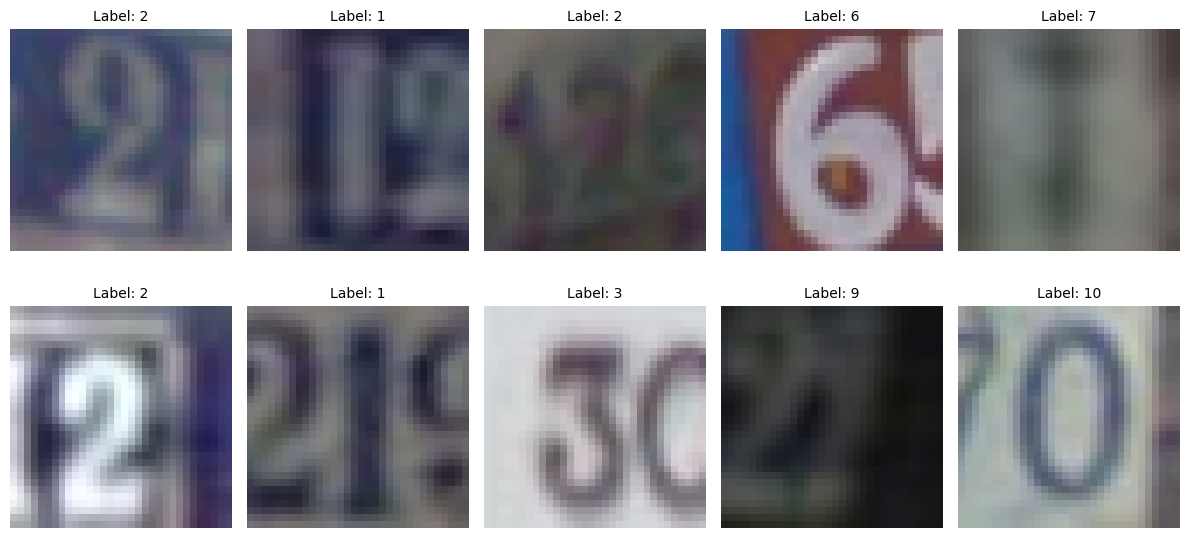

In [10]:

# Function to display images and labels
def display_images(images, labels, num_samples=10):
    idxs = np.random.randint(0, images.shape[3], num_samples)
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[:, :, :, idx])
        plt.title(f"Label: {labels[idx][0]}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Display a random sample of training images and labels
display_images(x_train, y_train)


In [11]:
# escalar/estandarizar x_train, x_test en rango [0-1]
def escalar_datos(train_images, test_images):
    
    # Reshape  y normalizar x_train y x_test
    x_train_scaled = train_images / 255.0
    x_test_scaled = test_images / 255.0
    
    return (x_train_scaled, x_test_scaled)

scaled_train_images, scaled_test_images=escalar_datos(x_train, x_test)

print(scaled_train_images.shape,y_train.shape)
print(scaled_test_images.shape,y_test.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


In [42]:
# Add a dummy channel dimension
# agregar dimension 'dummy'

#scaled_train_images = scaled_train_images[..., np.newaxis]
#scaled_test_images = scaled_test_images[..., np.newaxis]
#scaled_train_images.shape 

(32, 32, 3, 73257, 1)

In [103]:
# convertir a escala de grises
x_train_gray = np.mean(scaled_train_images, axis=2, keepdims=True)
x_test_gray = np.mean(scaled_test_images, axis=2, keepdims=True)

print(x_train_gray.shape,y_train.shape)
print(x_test_gray.shape,y_test.shape)


(32, 32, 1, 73257) (73257, 1)
(32, 32, 1, 26032) (26032, 1)


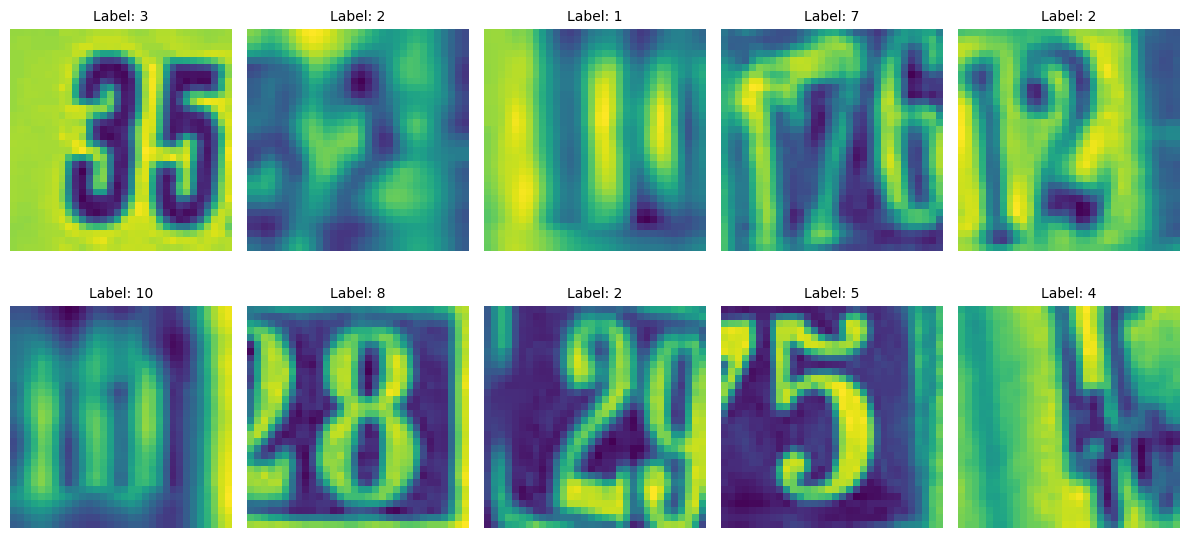

In [104]:
# Display a random sample of training images and labels
display_images(x_train_gray, y_train)

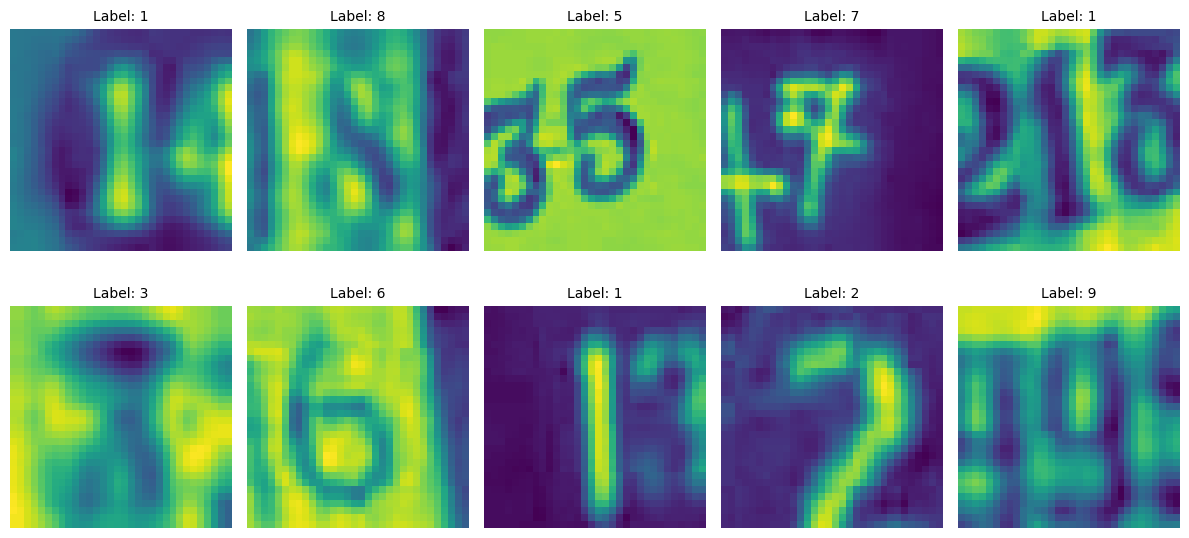

In [105]:
# Display a random sample of training images and labels
display_images(x_test_gray, y_test)

In [106]:
x_train_gray.shape

(32, 32, 1, 73257)

In [107]:
x_train_gray.shape[:3]

(32, 32, 1)

### Construir modelo MLP

In [111]:

def construir_MLP(input_shape):
    
    model = Sequential() # crear modelo MLP
    
    # input layer: 
    # input layer: capa Densa,  128 neuronas, input_shape=input_shape, activacion= 'relu'
    #model.add(Dense(128, activation='relu', input_shape=input_shape, name='input_layer'))    
    model.add(Flatten(input_shape=input_shape)) # (1,N) capa Flatten
    
    
    # agregar capas
    model.add(Dense(128, activation='relu')) #capa Densa,  128 neuronas,  activacion= 'relu'
    model.add(Dense(64, activation='relu')) #capa Densa,  64 neuronas,  activacion= 'relu'
    model.add(Dense(64, activation='relu')) #capa Densa,  64 neuronas,  activacion= 'relu'
    #model.add(Flatten()) # (1,N) capa Flatten
    
    # output layer: 10 neuronas, activation='softmax'
    model.add(Dense(10,activation='softmax',name='output_layer')) # #capa Densa,  10 neuronas,  activacion= 'softmax'
    
    
    # compilar modelo
    # parametros: optimizer='adam', loss='sparse_categorical_crossentropy', evaluacion accuracy
    model.compile(optimizer='adam',
                  loss=['sparse_categorical_crossentropy','mse'],
                  metrics=['accuracy','recall','precision'])
    model.summary()
    return model

model = construir_MLP( x_train_gray.shape[:3] )

# input shape
# x_train.shape[1],
#scaled_train_images[0].shape

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               131200    
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 144266 (563.54 KB)
Trainable params: 144266 (563.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Callbacks

In [5]:
def get_checkpoint_best_only1():
    """
    This function returns a ModelCheckpoint object that:
    - saves only the weights that generate the highest validation (testing) accuracy
    - saves into a directory called 'checkpoints_best_only' inside the current working directory
    - generates a file called 'checkpoints_best_only/checkpoint'
    """
    checkpoint_dir = 'checkpoints_best_only'
    checkpoint_filename = checkpoint_dir + '/checkpoint'
    
    #checkpoint_path = '/checkpoint'

    # Create the directory if it doesn't exist
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Create and return the ModelCheckpoint object with 'save_best_only' set to True
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename, 
                                 save_weights_only=True, 
                                 save_best_only=True, 
                                 monitor='val_accuracy', 
                                 mode='max')
    return checkpoint

    
def get_early_stopping1():
    """
    This function should return an EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    """
    checkpoint = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')
    return checkpoint

In [6]:
# crear Checkpoints callbacks
checkpoint_best_only1 = get_checkpoint_best_only1()
early_stopping1 = get_early_stopping1()

checkpoint_best_only1

### Entrenamiento

In [7]:
print(x_train_gray.shape,y_train.shape)

NameError: name 'x_train_gray' is not defined

In [114]:
# Transpose the dimensions of x_train_gray to (73257, 32, 32, 1)
x_train_gray = np.transpose(x_train_gray, (3, 0, 1, 2))

# Remove the extra dimension from y_train to get (73257,)
y_train = y_train.squeeze()


In [2]:
# lista de Checkpoint Callbacks
callbacks = [checkpoint_best_only1, early_stopping1]
# entrenar modelo con lista de Callback
history = model.fit(x_train_gray, y_train, epochs=20, batch_size=64, validation_split=0.2, validation_data=(x_test, y_test), callbacks=callbacks)

NameError: name 'checkpoint_best_only1' is not defined

### Curvas de aprendizaje

In [ ]:
#Run this cell to plot the accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
#Run this cell to plot the loss vs epoch graph

plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Evaluación

In [ ]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)

## RNN: Recurrent Neural Networks

In [77]:
# cargar bases de datos
tf.keras.utils.get_file(
    "ridership.tgz",
    "https://github.com/ageron/data/raw/main/ridership.tgz",
    cache_dir=".",
    extract=True
)



108512/108512 [==============================] - 0s 1us/step


'.\\datasets\\ridership.tgz'

In [80]:
path = Path("datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]  # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)  # no need for total, it's just bus + rail
df = df.drop_duplicates()  # remove duplicated months (2011-10 and 2014-07)
df

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917
...,...,...,...
2021-11-26,W,257700,189694
2021-11-27,A,237839,187065
2021-11-28,U,184817,147830


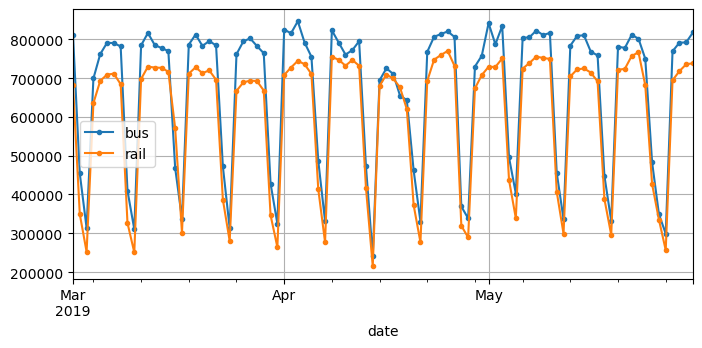

In [83]:
# Exploración (EDA)
df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8, 3.5))
#save_fig("daily_ridership_plot")  # extra code – saves the figure for the book
plt.show()

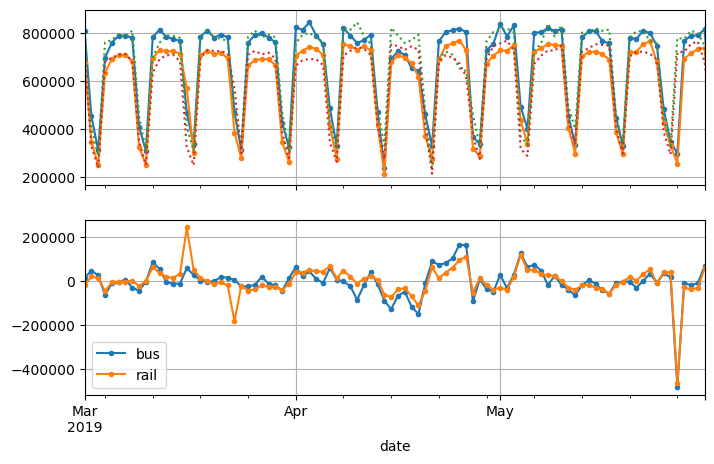

In [84]:
diff_7 = df[["bus", "rail"]].diff(7)["2019-03":"2019-05"]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
df.plot(ax=axs[0], legend=False, marker=".")  # original time series
df.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
diff_7.plot(ax=axs[1], grid=True, marker=".")  # 7-day difference time series
axs[0].set_ylim([170_000, 900_000])  # extra code – beautifies the plot
#save_fig("differencing_plot")  # extra code – saves the figure for the book
plt.show()

In [85]:
targets = df[["bus", "rail"]]["2019-03":"2019-05"]
(diff_7 / targets).abs().mean()

bus     0.082938
rail    0.089948
dtype: float64

C:\Users\dfoso\AppData\Local\Temp\ipykernel_1872\434596571.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()  # compute the mean for each month


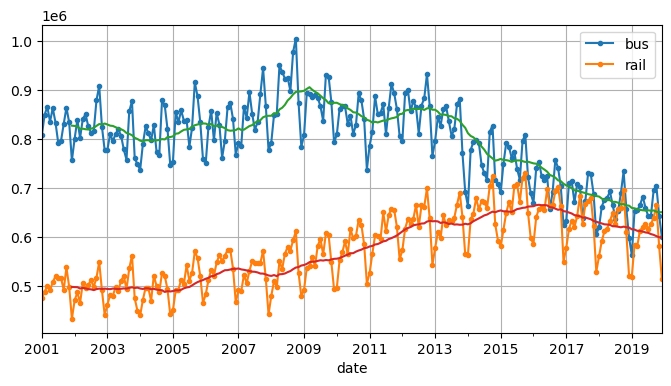

In [87]:
period = slice("2001", "2019")
df_monthly = df.resample('M').mean()  # compute the mean for each month
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
#save_fig("long_term_ridership_plot")  # extra code – saves the figure for the book
plt.show()

In [88]:
from statsmodels.tsa.arima.model import ARIMA

origin, today = "2019-01-01", "2019-05-31"
rail_series = df.loc[origin:today]["rail"].asfreq("D")
model = ARIMA(rail_series,
              order=(1, 0, 0),
              seasonal_order=(0, 1, 1, 7))
model = model.fit()
y_pred = model.forecast()  # returns 427,758.6

In [ ]:
origin, start_date, end_date = "2019-01-01", "2019-03-01", "2019-05-31"
time_period = pd.date_range(start_date, end_date)
rail_series = df.loc[origin:end_date]["rail"].asfreq("D")
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(rail_series[origin:today],  # train on data up to "today"
                  order=(1, 0, 0),
                  seasonal_order=(0, 1, 1, 7))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - rail_series[time_period]).abs().mean()  # returns 32,040.7

mae

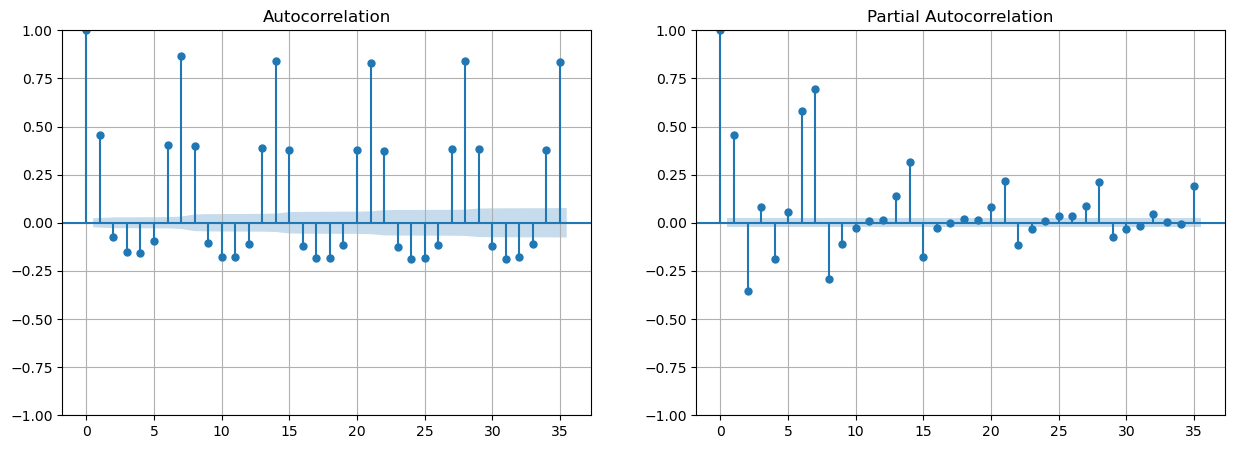

In [96]:
# Funciones de Autocorrelacion y Correlacion Parcial

# extra code – shows how to plot the Autocorrelation Function (ACF) and the
#              Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plot_acf(df[period]["rail"], ax=axs[0], lags=35)
axs[0].grid()
plot_pacf(df[period]["rail"], ax=axs[1], lags=35, method="ywm")
axs[1].grid()
plt.show()


In [94]:
my_series = [0, 1, 2, 3, 4, 5]
my_dataset = tf.keras.utils.timeseries_dataset_from_array(
    my_series,
    targets=my_series[3:],  # the targets are 3 steps into the future
    sequence_length=3,
    batch_size=2
)
list(my_dataset)
for window_dataset in tf.data.Dataset.range(6).window(4, shift=1):
    for element in window_dataset:
        print(f"{element}", end=" ")
    print()

dataset = tf.data.Dataset.range(6).window(4, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window_dataset: window_dataset.batch(4))
for window_tensor in dataset:
    print(f"{window_tensor}")
    
def to_windows(dataset, length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_ds: window_ds.batch(length))
def to_windows(dataset, length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_ds: window_ds.batch(length))

0 1 2 3 
1 2 3 4 
2 3 4 5 
3 4 5 
4 5 
5 
[0 1 2 3]
[1 2 3 4]
[2 3 4 5]


In [105]:
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

In [106]:
origin, start_date, end_date = "2019-01-01", "2019-03-01", "2019-05-31"
time_period = pd.date_range(start_date, end_date)
rail_series = df.loc[origin:end_date]["rail"].asfreq("D")
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(rail_series[origin:today],  # train on data up to "today"
                  order=(1, 0, 0),
                  seasonal_order=(0, 1, 1, 7))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - rail_series[time_period]).abs().mean()  # returns 32,040.7

In [107]:
seq_length = 56
tf.random.set_seed(42)  # extra code – ensures reproducibility
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_train.to_numpy(),
    targets=rail_train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),
    targets=rail_valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

### RNN simple

In [108]:
# crear RNN simple
tf.random.set_seed(42)  # extra code – ensures reproducibility
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
# extra code – defines a utility function we'll reuse several time

# metodo: entrenar(ajustar) y evaluar modelo
# callback: EarlyStopping (monitor=val_MAE, paciencia=50)
# optimizador: SGD

# compilar modelo (Huber, optimizador, metricas=MAE)
# entrenamiento(history)

def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    valid_loss, valid_mae = model.evaluate(valid_set)
    return valid_mae * 1e6

In [110]:
fit_and_evaluate(model, train_ds, valid_ds, learning_rate=0.02)

Epoch 1/500


33/33 [==============================] - 1s 13ms/step - loss: 0.6053 - mae: 0.9860 - val_loss: 0.0599 - val_mae: 0.2945
Epoch 2/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0528 - mae: 0.2659 - val_loss: 0.0473 - val_mae: 0.2464
Epoch 3/500
33/33 [==============================] - 1s 14ms/step - loss: 0.0288 - mae: 0.1719 - val_loss: 0.0220 - val_mae: 0.1522
Epoch 4/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0217 - mae: 0.1747 - val_loss: 0.0209 - val_mae: 0.1521
Epoch 5/500
33/33 [==============================] - 0s 9ms/step - loss: 0.0209 - mae: 0.1676 - val_loss: 0.0203 - val_mae: 0.1491
Epoch 6/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0202 - mae: 0.1675 - val_loss: 0.0198 - val_mae: 0.1459
Epoch 7/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0196 - mae: 0.1649 - val_loss: 0.0192 - val_mae: 0.1441
Epoch 8/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.

102814.14538621902

In [ ]:
# replicabilidad
tf.random.set_seed(42)  # extra code – ensures reproducibility
univar_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1)  # no activation function by default
])

In [ ]:
# extra code – compiles, fits, and evaluates the model, like earlier
fit_and_evaluate(univar_model, train_ds, valid_ds, learning_rate=0.05)

### Deep RNN

In [111]:
tf.random.set_seed(42)  # extra code – ensures reproducibility

# crear modelo deep RNN

# capa de entrada: SimpleRNN, 32 unidades, input_shape: [None, 1]

# capa conectada:
# capa SimpleRNN: 32 unidades, return_sequences=True
# capa SimpleRNN: 32 unidades

# capa de salida: Densa, 1 unidad (binaria)
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

# extra code – compiles, fits, and evaluates the model, like earlier
fit_and_evaluate(deep_model, train_ds, valid_ds, learning_rate=0.01)

Epoch 1/500
33/33 [==============================] - 4s 33ms/step - loss: 0.0185 - mae: 0.1448 - val_loss: 0.0050 - val_mae: 0.0829
Epoch 2/500
33/33 [==============================] - 1s 20ms/step - loss: 0.0051 - mae: 0.0720 - val_loss: 0.0026 - val_mae: 0.0484
Epoch 3/500
33/33 [==============================] - 1s 20ms/step - loss: 0.0041 - mae: 0.0613 - val_loss: 0.0022 - val_mae: 0.0400
Epoch 4/500
33/33 [==============================] - 1s 23ms/step - loss: 0.0037 - mae: 0.0557 - val_loss: 0.0022 - val_mae: 0.0383
Epoch 5/500
33/33 [==============================] - 1s 19ms/step - loss: 0.0035 - mae: 0.0526 - val_loss: 0.0023 - val_mae: 0.0407
Epoch 6/500
33/33 [==============================] - 1s 19ms/step - loss: 0.0039 - mae: 0.0601 - val_loss: 0.0026 - val_mae: 0.0476
Epoch 7/500
33/33 [==============================] - 1s 20ms/step - loss: 0.0035 - mae: 0.0550 - val_loss: 0.0028 - val_mae: 0.0518
Epoch 8/500
33/33 [==============================] - 1s 23ms/step - loss: 0.

29922.615736722946

In [115]:
# bases de datos - series  de tiempo

df_mulvar = df[["bus", "rail"]] / 1e6  # use both bus & rail series as input
df_mulvar["next_day_type"] = df["day_type"].shift(-1)  # we know tomorrow's type
df_mulvar = pd.get_dummies(df_mulvar)  # one-hot encode the day type

mulvar_train = df_mulvar["2016-01":"2018-12"]
mulvar_valid = df_mulvar["2019-01":"2019-05"]
mulvar_test = df_mulvar["2019-06":]

In [118]:
# crear clase: LNSimpleRNNCell
# parametros: capa
# atributos: state_size, output_size, simple_rnn_cell, layer_norm, activation
# metodos: inicializador, call


class LNSimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = tf.keras.layers.SimpleRNNCell(units,
                                                             activation=None)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.activation = tf.keras.activations.get(activation)

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [117]:
tf.random.set_seed(42)  # extra code – ensures reproducibility

def to_seq2seq_dataset(series, seq_length=56, ahead=14, target_col=1,
                       batch_size=32, shuffle=False, seed=None):
    ds = to_windows(tf.data.Dataset.from_tensor_slices(series), ahead + 1)
    ds = to_windows(ds, seq_length).map(lambda S: (S[:, 0], S[:, 1:, 1]))
    if shuffle:
        ds = ds.shuffle(8 * batch_size, seed=seed)
    return ds.batch(batch_size)

seq2seq_train = to_seq2seq_dataset(mulvar_train, shuffle=True, seed=42)
seq2seq_valid = to_seq2seq_dataset(mulvar_valid)


Epoch 1/5
33/33 [==============================] - 3s 47ms/step - loss: 0.0747 - mae: 0.2737 - val_loss: 0.0181 - val_mae: 0.1431
Epoch 2/5
33/33 [==============================] - 1s 19ms/step - loss: 0.0141 - mae: 0.1374 - val_loss: 0.0143 - val_mae: 0.1194
Epoch 3/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0115 - mae: 0.1220 - val_loss: 0.0128 - val_mae: 0.1128
Epoch 4/5
33/33 [==============================] - 1s 20ms/step - loss: 0.0104 - mae: 0.1129 - val_loss: 0.0117 - val_mae: 0.1093
Epoch 5/5
3/3 [==============================] - 0s 19ms/step - loss: 0.0104 - mae: 0.1040


104004.42779064178

In [121]:
# crear RNN personalizada
# capa de entrada: LNSimpleRNNCell, input_shape: [None, 5]
# capa de salida: Densa, 14 unidades(clases)
custom_ln_model = tf.keras.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(32), return_sequences=True,
                        input_shape=[None, 5]),
    tf.keras.layers.Dense(14)
])

fit_and_evaluate(custom_ln_model, seq2seq_train, seq2seq_valid,
                 learning_rate=0.1, epochs=5)


Epoch 1/5


33/33 [==============================] - 3s 27ms/step - loss: 0.0696 - mae: 0.2740 - val_loss: 0.0194 - val_mae: 0.1444
Epoch 2/5
33/33 [==============================] - 1s 22ms/step - loss: 0.0140 - mae: 0.1395 - val_loss: 0.0147 - val_mae: 0.1216
Epoch 3/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0113 - mae: 0.1218 - val_loss: 0.0122 - val_mae: 0.1126
Epoch 4/5
33/33 [==============================] - 1s 23ms/step - loss: 0.0100 - mae: 0.1120 - val_loss: 0.0110 - val_mae: 0.1050
Epoch 5/5
3/3 [==============================] - 0s 19ms/step - loss: 0.0100 - mae: 0.0991


99105.87221384048

### RNN Personalizada

In [123]:
# clase: MyRNN
# parametros: capa
# atributos: cell, return_sequences
# metodos: get_initial_state, call 

class MyRNN(tf.keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences

    def get_initial_state(self, inputs):
        try:
            return self.cell.get_initial_state(inputs)
        except AttributeError:
            # fallback to zeros if self.cell has no get_initial_state() method
            batch_size = tf.shape(inputs)[0]
            return [tf.zeros([batch_size, self.cell.state_size],
                             dtype=inputs.dtype)]

    @tf.function
    def call(self, inputs):
        states = self.get_initial_state(inputs)
        shape = tf.shape(inputs)
        batch_size = shape[0]
        n_steps = shape[1]
        sequences = tf.TensorArray(
            inputs.dtype, size=(n_steps if self.return_sequences else 0))
        outputs = tf.zeros(shape=[batch_size, self.cell.output_size],
                           dtype=inputs.dtype)
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            if self.return_sequences:
                sequences = sequences.write(step, outputs)

        if self.return_sequences:
            # stack the outputs into an array of shape
            # [time steps, batch size, dims], then transpose it to shape
            # [batch size, time steps, dims]
            return tf.transpose(sequences.stack(), [1, 0, 2])
        else:
            return outputs

In [125]:
tf.random.set_seed(42)
# crear modelo Sequential
# RNN personalizada

# capa de entada: LNSimpleRNNCell, input_shape=[None, 5]
# capa de salida: Densa, 14 unidades(clases)
custom_model = tf.keras.Sequential([
    MyRNN(LNSimpleRNNCell(32), return_sequences=True, input_shape=[None, 5]),
    tf.keras.layers.Dense(14)
])

custom_model
# entrenar/ajustar y evaluar 
# epochs= 5
fit_and_evaluate(custom_model, seq2seq_train, seq2seq_valid,
                 learning_rate=0.1, epochs=5)

Epoch 1/5
33/33 [==============================] - 2s 35ms/step - loss: 0.0642 - mae: 0.2575 - val_loss: 0.0180 - val_mae: 0.1370
Epoch 2/5
33/33 [==============================] - 1s 25ms/step - loss: 0.0142 - mae: 0.1401 - val_loss: 0.0152 - val_mae: 0.1203
Epoch 3/5
33/33 [==============================] - 1s 26ms/step - loss: 0.0116 - mae: 0.1238 - val_loss: 0.0129 - val_mae: 0.1093
Epoch 4/5
33/33 [==============================] - 1s 30ms/step - loss: 0.0102 - mae: 0.1123 - val_loss: 0.0115 - val_mae: 0.1017
Epoch 5/5
3/3 [==============================] - 0s 28ms/step - loss: 0.0096 - mae: 0.0934


93404.08444404602

## LSTM: Long-Short Term Memory

In [127]:
# crear modelo LSTM basico
# capa de entrada: LSTM, 32 unidades, input_shape=[None, 5],return_sequences=True
# capa de salida:  Densa, 14 unidades (clases)
tf.random.set_seed(42)  # extra code – ensures reproducibility
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 5]),
    tf.keras.layers.Dense(14)
])


fit_and_evaluate(lstm_model, seq2seq_train, seq2seq_valid,
                 learning_rate=0.1, epochs=5)

Epoch 1/5
33/33 [==============================] - 4s 42ms/step - loss: 0.0616 - mae: 0.2701 - val_loss: 0.0187 - val_mae: 0.1623
Epoch 2/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0167 - mae: 0.1562 - val_loss: 0.0170 - val_mae: 0.1433
Epoch 3/5
33/33 [==============================] - 1s 24ms/step - loss: 0.0151 - mae: 0.1496 - val_loss: 0.0162 - val_mae: 0.1376
Epoch 4/5
33/33 [==============================] - 1s 22ms/step - loss: 0.0143 - mae: 0.1440 - val_loss: 0.0152 - val_mae: 0.1356
Epoch 5/5
3/3 [==============================] - 0s 32ms/step - loss: 0.0146 - mae: 0.1304


130406.36479854584

##  GRU 

In [128]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True, input_shape=[None, 5]),
    tf.keras.layers.Dense(14)
])

fit_and_evaluate(gru_model, seq2seq_train, seq2seq_valid,
                 learning_rate=0.1, epochs=5)

Epoch 1/5
33/33 [==============================] - 3s 35ms/step - loss: 0.0571 - mae: 0.2557 - val_loss: 0.0190 - val_mae: 0.1637
Epoch 2/5
33/33 [==============================] - 1s 19ms/step - loss: 0.0158 - mae: 0.1481 - val_loss: 0.0150 - val_mae: 0.1364
Epoch 3/5
33/33 [==============================] - 1s 20ms/step - loss: 0.0131 - mae: 0.1343 - val_loss: 0.0137 - val_mae: 0.1275
Epoch 4/5
33/33 [==============================] - 1s 19ms/step - loss: 0.0119 - mae: 0.1265 - val_loss: 0.0127 - val_mae: 0.1222
Epoch 5/5
3/3 [==============================] - 0s 19ms/step - loss: 0.0119 - mae: 0.1187


118669.92712020874

## Deep Computer Vision

In [3]:
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

No GPU was detected. Neural nets can be very slow without a GPU.


In [6]:
# cargar bases de datos  (imagenes)
images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

images.shape

TensorShape([2, 70, 120, 3])

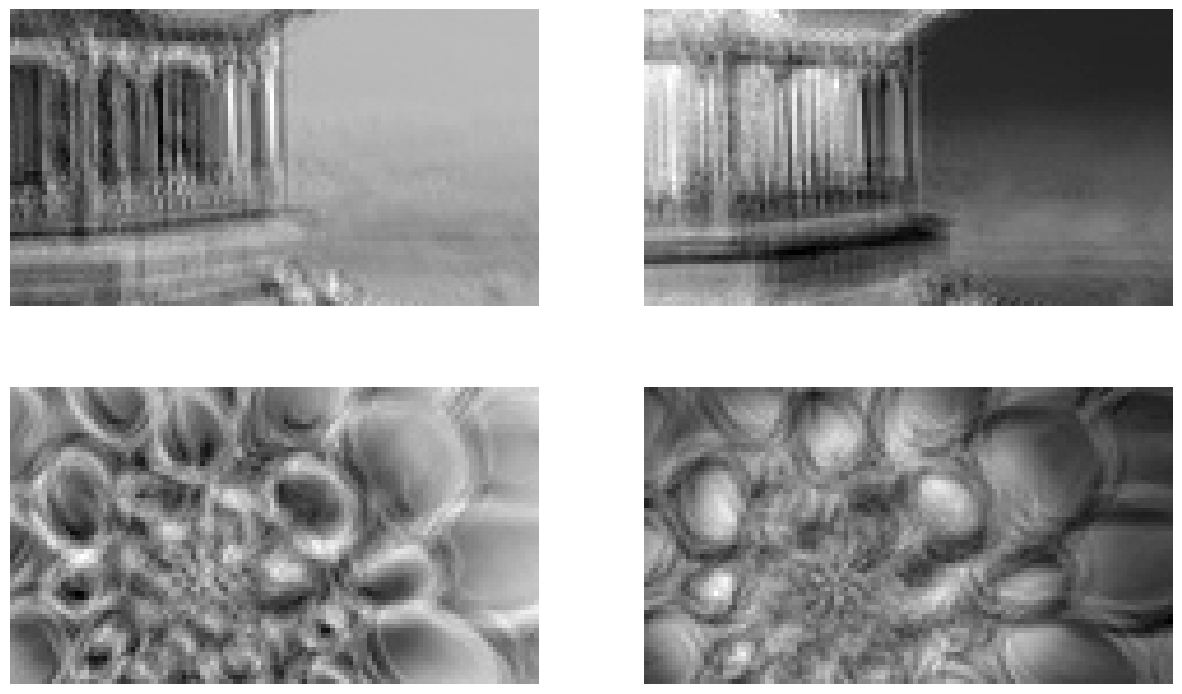

In [10]:
tf.random.set_seed(42)  # extra code – ensures reproducibility

# capa convolucional: 32 filtros, kernel_size=7
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

# forma del tensor 
fmaps.shape

# plot imagenes
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [14]:

# capa convolucional: 32 filtros, kernel_size=7
# padding="same" (zero padding)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)
fmaps.shape



TensorShape([2, 70, 120, 32])

In [13]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                    strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [15]:
def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=7, strides=2, padding="same")

(array([35, 60]), array([5, 5]))

In [18]:
# pesos de redes neuronales
kernels, biases = conv_layer.get_weights()
kernels.shape

tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

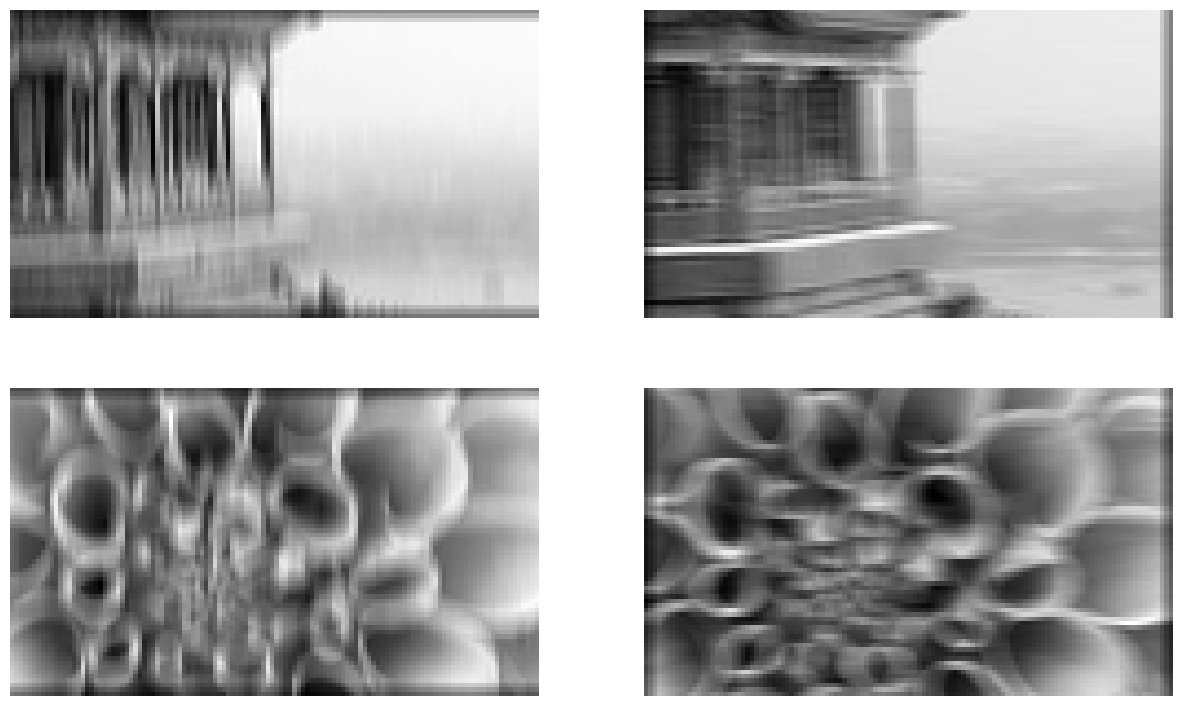

In [19]:


# extra code – shows how to manually create two filters to get images similar
#              to those in Figure 14–5.

plt.figure(figsize=(15, 9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

### Pooling

### Max Pooling




In [23]:
# capa de pooling: max pooling, pool_size=2
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
output = max_pool(images)
output

<tf.Tensor: shape=(2, 35, 60, 3), dtype=float32, numpy=
array([[[[0.4901961 , 0.54901963, 0.5686275 ],
         [0.3647059 , 0.47450984, 0.4784314 ],
         [0.24705884, 0.39607847, 0.3529412 ],
         ...,
         [0.90196085, 0.8980393 , 0.9176471 ],
         [0.9058824 , 0.90196085, 0.9215687 ],
         [0.9058824 , 0.9058824 , 0.9215687 ]],

        [[0.48627454, 0.4039216 , 0.46274513],
         [0.26666668, 0.27058825, 0.28627452],
         [0.43137258, 0.5137255 , 0.49411768],
         ...,
         [0.90196085, 0.90196085, 0.909804  ],
         [0.90196085, 0.90196085, 0.909804  ],
         [0.9058824 , 0.9058824 , 0.91372555]],

        [[0.32156864, 0.30588236, 0.23137257],
         [0.3254902 , 0.29803923, 0.19607845],
         [0.36078432, 0.30980393, 0.27450982],
         ...,
         [0.90196085, 0.90196085, 0.909804  ],
         [0.90196085, 0.90196085, 0.909804  ],
         [0.9058824 , 0.9058824 , 0.91372555]],

        ...,

        [[0.5137255 , 0.25490198, 0.

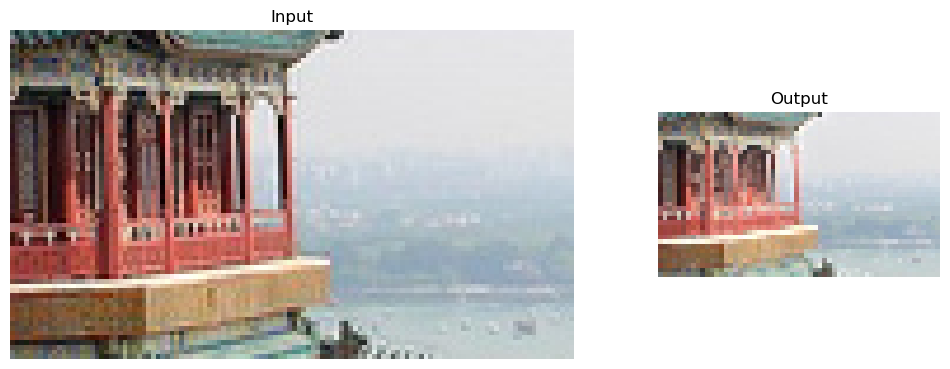

In [24]:
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

### Depth-wise pooling

In [27]:
# extra code – shows how to use the max_pool() op; only works on the CPU
np.random.seed(42)
fmaps = np.random.rand(2, 70, 120, 60)
with tf.device("/cpu:0"):
    output = tf.nn.max_pool(fmaps, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
                            padding="VALID")
output.shape

class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size
    
    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)
    
# extra code – shows that this custom layer gives the same result as max_pool()
np.allclose(DepthPool(pool_size=3)(fmaps), output)

True

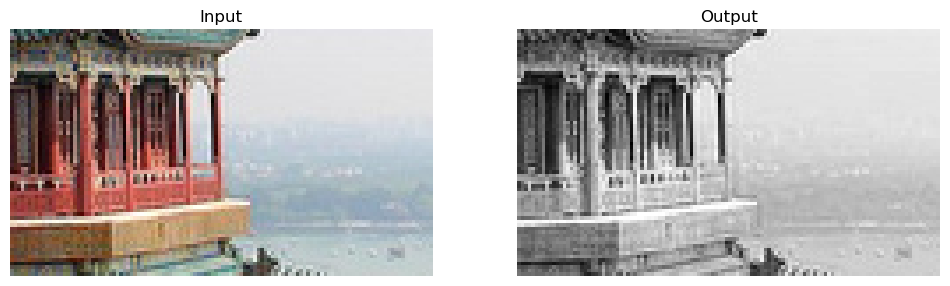

In [28]:
# extra code – computes and displays the output of the depthwise pooling layer

depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(images[0])  # plot the 1st image
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output")
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # plot 1st image's output
plt.axis("off")
plt.show()

### Global Average Pooling

In [30]:
# capa GlobalAvgPool2D
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

global_avg_pool2 = tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X, axis=[1, 2]))

global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.26011038, 0.10849128]], dtype=float32)>

## Arquitecturas de Redes CNN

In [32]:

# extra code – loads the mnist dataset, add the channels axis to the inputs,
#              scales the values to the 0-1 range, and splits the dataset

# cargar bases de datos MNIST
mnist = tf.keras.datasets.fashion_mnist.load_data()
# separar base de datos en datos de entrenamiento y datos de prueba
(X_train_full, y_train_full), (X_test, y_test) = mnist

# preprocesamiento de imagenes
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [35]:
from functools import partial

tf.random.set_seed(42)  # extra code – ensures reproducibility

# crear capa convolucional 2D
# kernel_size=3, padding="same" (zero padding), activacion=relu, kernel_initializer="he_normal"
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# crear modelo Sequential

# capa de entrada: capa convolucional 2D, input_shape=[28, 28, 1], filters=64, kernel_size=7
# capa pooling: max pooling 2D


# capas convolucionales:
# 2 capas convolucionales 2D, filters=128
# capa pooling: max pooling 2D

# 2 capas convolucionales 2D, filters=256
# capa pooling: max pooling 2D


# capas conectadas: 
# capa plana
# capa densa: 128 unidades, activacion=relu, kernel_initializer="he_normal"
# capa de regularizacion: Dropout(0.5)
# capa densa: 64 unidades, activacion=relu, kernel_initializer="he_normal"
# capa de regularizacion: Dropout(0.5)


# capa de salida: capa densa, 10 unidades (clases),  activacion=softmax

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),    
    tf.keras.layers.MaxPool2D(),
    
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    
    
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 256)        

In [ ]:

# compilar modelo: loss function (perdidas) sparse_categorical_crossentropy (multiclase)
# optimizador: Nadam, metrica de evaluacion= accuracy?
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

# entrenamiento 
# epochs: 10
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# evaluar modelo en datos de prueba
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  # pretend we have new images
y_pred = model.predict(X_new)

### LeNet-5

The famous LeNet-5 architecture had the following layers:

Layer  | Type            | Maps | Size     | Kernel size | Stride | Activation
-------|-----------------|------|----------|-------------|--------|-----------
 Out   | Fully connected | –    | 10       | –           | –      | RBF
 F6    | Fully connected | –    | 84       | –           | –      | tanh
 C5    | Convolution     | 120  | 1 × 1    | 5 × 5       | 1      | tanh
 S4    | Avg pooling     | 16   | 5 × 5    | 2 × 2       | 2      | tanh
 C3    | Convolution     | 16   | 10 × 10  | 5 × 5       | 1      | tanh
 S2    | Avg pooling     | 6    | 14 × 14  | 2 × 2       | 2      | tanh
 C1    | Convolution     | 6    | 28 × 28  | 5 × 5       | 1      | tanh
 In    | Input           | 1    | 32 × 32  | –           | –      | –


### ResNet-34

In [84]:

# capa convolucional 2D
# kernel_size=3, strides=1, padding='same', kernel_initializer="he_normal"
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal",
                        use_bias=False)
# clase ResidualUnit
# parametros: capa
# metodos: inicializar, call
 
class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

# crear modelo Sequential

# capa de entrada: convolucional 2D (default), input_shape=[224, 224, 3], 64 unidades?, 
# #kernel_size=7, strides=2
# capas convolucionales
# capa de regularizacion: BatchNormalization
# capa de activacion: relu
# capa de pooling: max pooling, pool_size=3, strides=2, padding='same'
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[224, 224, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3: # iterar sobre filtros
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
# agregar capa de pooling: GlobalAvgPool2D

# capa plana

# capa de salida: densa, 10 unidades (clases), activacion= softmax

model.add(tf.keras.layers.GlobalAvgPool2D()) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))
    

model.summary()
    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization_72 (Ba  (None, 112, 112, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_2 (Activation)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 residual_unit_32 (Residual  (None, 56, 56, 64)        74240     
 Unit)                                                           
                                                      

## GPU


In this example, we are using data parallelism to split the training accross multiple GPUs. Each GPU has a full replica of the neural network model, and the weights (i.e. variables) are updated synchronously by waiting that each GPU process its batch of data.


<img src="https://www.tensorflow.org/images/Parallelism.png" alt="Parallelism" style="width: 400px;"/>

In [80]:
# cargar bases de datos
#tf.keras.datasets.fashion_mnist.load_data() import input_data
mnist =tf.keras.datasets.fashion_mnist.load_data()

# parametros
num_gpus = 2
num_steps = 200
learning_rate = 0.001
batch_size = 1024
display_step = 10

# parametros de red neuronal
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# Build a convolutional neural network
def conv_net(x, n_classes, dropout, reuse, is_training):
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 64 filters and a kernel size of 5
        x = tf.layers.conv2d(x, 64, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        x = tf.layers.max_pooling2d(x, 2, 2)

        # Convolution Layer with 256 filters and a kernel size of 5
        x = tf.layers.conv2d(x, 256, 3, activation=tf.nn.relu)
        # Convolution Layer with 512 filters and a kernel size of 5
        x = tf.layers.conv2d(x, 512, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        x = tf.layers.max_pooling2d(x, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        x = tf.contrib.layers.flatten(x)

        # Fully connected layer (in contrib folder for now)
        x = tf.layers.dense(x, 2048)
        # Apply Dropout (if is_training is False, dropout is not applied)
        x = tf.layers.dropout(x, rate=dropout, training=is_training)

        # Fully connected layer (in contrib folder for now)
        x = tf.layers.dense(x, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        x = tf.layers.dropout(x, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(x, n_classes)
        # Because 'softmax_cross_entropy_with_logits' loss already apply
        # softmax, we only apply softmax to testing network
        out = tf.nn.softmax(out) if not is_training else out

    return out




In [81]:

# Build the function to average the gradients
def average_gradients(tower_grads):
    average_grads = []
    for grad_and_vars in zip(*tower_grads):
        # Note that each grad_and_vars looks like the following:
        #   ((grad0_gpu0, var0_gpu0), ... , (grad0_gpuN, var0_gpuN))
        grads = []
        for g, _ in grad_and_vars:
            # Add 0 dimension to the gradients to represent the tower.
            expanded_g = tf.expand_dims(g, 0)

            # Append on a 'tower' dimension which we will average over below.
            grads.append(expanded_g)

        # Average over the 'tower' dimension.
        grad = tf.concat(grads, 0)
        grad = tf.reduce_mean(grad, 0)

        # Keep in mind that the Variables are redundant because they are shared
        # across towers. So .. we will just return the first tower's pointer to
        # the Variable.
        v = grad_and_vars[0][1]
        grad_and_var = (grad, v)
        average_grads.append(grad_and_var)
    return average_grads

In [82]:
# By default, all variables will be placed on '/gpu:0'

PS_OPS = ['Variable', 'VariableV2', 'AutoReloadVariable']

def assign_to_device(device, ps_device='/cpu:0'):
    def _assign(op):
        node_def = op if isinstance(op, tf.NodeDef) else op.node_def
        if node_def.op in PS_OPS:
            return "/" + ps_device
        else:
            return device

    return _assign

In [ ]:
# Place all ops on CPU by default
with tf.device('/cpu:0'):
    tower_grads = []
    reuse_vars = False

    # tf Graph input
    X = tf.placeholder(tf.float32, [None, num_input])
    Y = tf.placeholder(tf.float32, [None, num_classes])

    # Loop over all GPUs and construct their own computation graph
    for i in range(num_gpus):
        with tf.device(assign_to_device('/gpu:{}'.format(i), ps_device='/cpu:0')):

            # Split data between GPUs
            _x = X[i * batch_size: (i+1) * batch_size]
            _y = Y[i * batch_size: (i+1) * batch_size]

            # Because Dropout have different behavior at training and prediction time, we
            # need to create 2 distinct computation graphs that share the same weights.

            # Create a graph for training
            logits_train = conv_net(_x, num_classes, dropout,
                                    reuse=reuse_vars, is_training=True)
            # Create another graph for testing that reuse the same weights
            logits_test = conv_net(_x, num_classes, dropout,
                                   reuse=True, is_training=False)

            # Define loss and optimizer (with train logits, for dropout to take effect)
            loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                logits=logits_train, labels=_y))
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            grads = optimizer.compute_gradients(loss_op)

            # Only first GPU compute accuracy
            if i == 0:
                # Evaluate model (with test logits, for dropout to be disabled)
                correct_pred = tf.equal(tf.argmax(logits_test, 1), tf.argmax(_y, 1))
                accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

            reuse_vars = True
            tower_grads.append(grads)

    tower_grads = average_gradients(tower_grads)
    train_op = optimizer.apply_gradients(tower_grads)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)
        step = 1
        # Keep training until reach max iterations
        for step in range(1, num_steps + 1):
            # Get a batch for each GPU
            batch_x, batch_y = mnist.train.next_batch(batch_size * num_gpus)
            # Run optimization op (backprop)
            ts = time.time()
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            te = time.time() - ts
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                print("Step " + str(step) + ": Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc) + ", %i Examples/sec" % int(len(batch_x)/te))
            step += 1
        print("Optimization Finished!")

        # Calculate accuracy for 1000 mnist test images
        print("Testing Accuracy:", \
            np.mean([sess.run(accuracy, feed_dict={X: mnist.test.images[i:i+batch_size],
            Y: mnist.test.labels[i:i+batch_size]}) for i in range(0, len(mnist.test.images), batch_size)]))